In [1]:
import ee

# try to initalize an ee sessio n
# if not authenticated then run auth workflow and initialize
try:
    ee.Initialize()
except:
    ee.Authenticate()
    ee.Initialize()

In [2]:
import eemont, geemap
import geemap.colormaps as cm
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
import ipywidgets as widgets
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point,Polygon
import numpy as np
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
import unidecode
import pyproj
from sqlalchemy import create_engine
import psycopg2
import statistics
from scipy import signal
import datetime
from datetime import time, timedelta, date
from datetime import datetime
import ee
import geemap
import os, glob
import rasterio
#import rpy2.robjects as robjects
import sys
import json
import geojson
from dateutil.relativedelta import relativedelta
import time
from joblib import Parallel, delayed
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [3]:
class MonitoramentoBusiness:
    
    def conecta_db(self, host, port, db, user, password):
        con = psycopg2.connect(host=host, 
                             port = port,
                             database=db,
                             user=user, # DEFINE! 
                             password=password, # DEFINE!
                             keepalives=1,
                             keepalives_idle=0,
                             keepalives_interval=0,
                             keepalives_count=0)
        return con
    
    
    def consultar_db(self, sql, con):
        #con = conecta_db_homolog()
        cur = con.cursor()
        cur.execute(sql)
        recset = cur.fetchall()
        registros = []
        for rec in recset:
            registros.append(rec)
            con.close()
        return registros
    
    def get_area_soybeans(self, layer, geometry):
        pixelArea = ee.Image.pixelArea()
        factor_ha = 0.0001
        area_ha = layer.multiply(pixelArea.multiply(factor_ha).rename('area_ha'))

        area = area_ha.reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry= geometry,
            scale= 30)

        return list(area.getInfo().items())[0]
    
    def get_merx_soy_mask(self):
        merx_to_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/remap_soja_to_2022')
        merx_sp_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_sp_2022')
        merx_sc_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_sc_2022')
        merx_rs_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_rs_2022')
        merx_ro_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_ro_2022')
        merx_pr_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_pr_2022')
        merx_pi_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_pi_2022')
        merx_pa_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_pa_2022')
        merx_mt_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_mt_2022')
        merx_ms_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_ms_2022')
        merx_mg_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_mg_2022')
        merx_ma_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_ma_2022')
        merx_go_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_go_2022')
        merx_ba_2022 = ee.Image('projects/ee-carbonei/assets/mapeamento/soja_ba_2022')

        merx_soja= ee.ImageCollection([merx_ma_2022,merx_go_2022, merx_to_2022 ,merx_ba_2022, merx_mt_2022, merx_sp_2022, merx_sc_2022, merx_rs_2022, merx_ro_2022, merx_pr_2022 , merx_pi_2022, merx_pa_2022, merx_ms_2022, merx_mg_2022 ]).mosaic();
        return merx_soja
    
    def get_soy(self):
        collection_7 = ee.Image('projects/mapbiomas-workspace/public/collection7/mapbiomas_collection70_integration_v2')
        classification_2001 = collection_7.select('classification_2001').reproject('EPSG:4326', None, 30)
        classification_2010 = collection_7.select('classification_2010').reproject('EPSG:4326', None, 30)
        classification_2011 = collection_7.select('classification_2011').reproject('EPSG:4326', None, 30)
        classification_2012 = collection_7.select('classification_2012').reproject('EPSG:4326', None, 30)
        classification_2013 = collection_7.select('classification_2013').reproject('EPSG:4326', None, 30)
        classification_2014 = collection_7.select('classification_2014').reproject('EPSG:4326', None, 30)
        classification_2015 = collection_7.select('classification_2015').reproject('EPSG:4326', None, 30)
        classification_2016 = collection_7.select('classification_2016').reproject('EPSG:4326', None, 30)
        classification_2017 = collection_7.select('classification_2017').reproject('EPSG:4326', None, 30)
        classification_2018 = collection_7.select('classification_2018').reproject('EPSG:4326', None, 30)
        classification_2019 = collection_7.select('classification_2019').reproject('EPSG:4326', None, 30)
        classification_2020 = collection_7.select('classification_2020').reproject('EPSG:4326', None, 30)
        classification_2021 = collection_7.select('classification_2021').reproject('EPSG:4326', None, 30)

        soja_cod = 39 # Código, Mapbiomas

        #soja_01 = classification_2001.eq(soja_cod).selfMask()
        soja_10 = classification_2010.eq(soja_cod).selfMask()
        soja_11 = classification_2011.eq(soja_cod).selfMask()
        soja_12 = classification_2012.eq(soja_cod).selfMask()
        soja_13 = classification_2013.eq(soja_cod).selfMask()
        soja_14 = classification_2014.eq(soja_cod).selfMask()
        soja_15 = classification_2015.eq(soja_cod).selfMask()
        soja_16 = classification_2016.eq(soja_cod).selfMask()
        soja_17 = classification_2017.eq(soja_cod).selfMask()
        soja_18 = classification_2018.eq(soja_cod).selfMask()
        soja_19 = classification_2019.eq(soja_cod).selfMask()        
        soja_20 = classification_2020.eq(soja_cod).selfMask()
        soja_21 = classification_2021.eq(soja_cod).selfMask()

        

        #soja01_area = getareasoybeans(soja_01,CAR)
        soja10_area = self.get_area_soybeans(soja_10,CAR)
        soja11_area = self.get_area_soybeans(soja_11,CAR)
        soja12_area = self.get_area_soybeans(soja_12,CAR)
        soja13_area = self.get_area_soybeans(soja_13,CAR)
        soja14_area = self.get_area_soybeans(soja_14,CAR)
        soja15_area = self.get_area_soybeans(soja_15,CAR)
        soja16_area = self.get_area_soybeans(soja_16,CAR)
        soja17_area = self.get_area_soybeans(soja_17,CAR)
        soja18_area = self.get_area_soybeans(soja_18,CAR)
        soja19_area = self.get_area_soybeans(soja_19,CAR)
        soja20_area = self.get_area_soybeans(soja_20,CAR)
        soja21_area = self.get_area_soybeans(soja_21,CAR)
        merx_soja = self.get_merx_soy_mask()
        soja22_area = self.get_area_soybeans(merx_soja,CAR) ## Area de soja merx

        f = '{:,}'

        df_soja = pd.DataFrame(
           {#'2001': [f.format(int(soja01_area[1])).replace(',','.')],
            '2009/10': [f.format(int(soja10_area[1])).replace(',','.')],
            '2010/11': [f.format(int(soja11_area[1])).replace(',','.')],
            '2011/12': [f.format(int(soja12_area[1])).replace(',','.')],
            '2012/13': [f.format(int(soja13_area[1])).replace(',','.')],
            '2013/14': [f.format(int(soja14_area[1])).replace(',','.')],
            '2014/15': [f.format(int(soja15_area[1])).replace(',','.')],
            '2015/16': [f.format(int(soja16_area[1])).replace(',','.')],
            '2016/17': [f.format(int(soja17_area[1])).replace(',','.')],
            '2017/18': [f.format(int(soja18_area[1])).replace(',','.')],
            '2018/19': [f.format(int(soja19_area[1])).replace(',','.')],
            '2019/20': [f.format(int(soja20_area[1])).replace(',','.')],
            '2020/21': [f.format(int(soja21_area[1])).replace(',','.')],
            '2021/22': [f.format(int(soja22_area[1])).replace(',','.')]},
             index = ['Área (ha)'])
        
        return df_soja
    
    def texture(self, clay_mean, sand_mean):
        if clay_mean >= 35:
            return "ARGILOSO"
        elif clay_mean < 35 and sand_mean < 85:
            return "TEXTURA MÉDIA"
        elif clay_mean <= 15 and sand_mean >= 70:
            return "ARENOSO"
        else:
            return "Sem informação"
        
        
    def soil_properties_statistics(self, dataset, CAR, method):
        soil_property = dataset.reduceRegion(
                      reducer=method,
                      geometry=CAR,
                      scale=250)
        
        return soil_property.getInfo()['mean']
    
    def get_soil_properties(self, CAR, soil_property_areia, soil_property):

        soil_property_mean = self.soil_properties_statistics(soil_property, CAR, ee.Reducer.mean())

        soil_property_mean_areia = self.soil_properties_statistics(soil_property_areia, CAR, ee.Reducer.mean())
        textura = self.texture(soil_property_mean, soil_property_mean_areia)
        return textura
    
    def get_cabecalho(self, cab, b, cod, lat, lon, f):
        df_cab = pd.DataFrame({'': [cab.iloc[0]['nom_munici'],cod[0:2], cod, lat, lon,'13/12/2021' ,\
                                    int(cab.iloc[0]['num_area']), cab.iloc[0]['situacao']]},\
                              index=['Município:', 'UF:', 'CAR Fazenda:', 'Latitude:', 'Longitude:', 'Data de registro no Serviço Florestal:','Área total declarada (ha):', 'Situação:'])
        return df_cab
    
    def outlineEdges(self, featureCollection, width):
        fc = ee.Image().byte().paint(**{
            'featureCollection': featureCollection,
            'color': 1, # black
            'width': width})
        return fc
    
    def get_produtividade(self, con):
        ##Consultando BD ZARC e estruturando o data frame
        produtividade = self.consultar_db('SELECT * FROM ibge.produtividade_2017_2021', con) 
        df_produtividade = pd.DataFrame(produtividade)
        df_produtividade = df_produtividade.rename(columns={0: "Município", 1: "UF", 2: "Produtividade 2017 (kg/ha)", 3:"Produtividade 2018 (kg/ha)", 4:" Produtividade 2019 (kg/ha)", 5: "Produtividade 2020 (kg/ha)", 6:"Produtividade 2021 (kg/ha)", 7:"Media (kg/ha)" })
        return df_produtividade
    
    def get_zarc(self, cab, cod, con):
        #print(self)
        zarc = self.consultar_db('SELECT * FROM zarc.zarc_'+cod[0:2].lower(), con) 
        df = pd.DataFrame (zarc)
        df = df.rename(columns={0: "id", 1: "safra", 2: "uf", 3:"cod_mun", 4:"municipio", 7: "cultura", 8:"Grupo", 10:"textura", 11:1, 12:2, 13:3, 14:4, 15:5,16:6,17:7,18:8,19:9,20:10,21:11,22:12,23:13,24:14,25:15,26:16,27:17,28:18,29:19,30:20,31:21,32:22,33:23,34:24,35:25,36:26,37:27,38:28,39:29,40:30,41:31,42:32,43:33,44:34,45:35,46:36})
        accented_string = cab.iloc[0]['nom_munici']
        unaccented_string = unidecode.unidecode(accented_string)
        df = df.loc[df.municipio == unaccented_string.upper()] 
        #
        df = df.loc[df.textura == textura]

        df_moda = df. iloc[:, 11:47]
        df_modat = df_moda.transpose()

        df_modat['Risco ZARC']=  df_modat.apply(lambda row: statistics.mode(row), axis=1).astype(int)
        df_moda = df_modat.transpose()
        day1 = '01-01-22'
        day1 = datetime.strptime(day1, '%d-%m-%y')
        day9 = day1 + timedelta(days = (9))
        day9
        first_day = []
        last_day = []
        first_day.insert(0, day1)
        last_day.insert(0, day9)
        first_day.insert(1, day1)
        last_day.insert(1, day9)


        for i in range(2,37):
            first_day.append(first_day[i-1] + timedelta(days = 10))

        for i in range(2,37):
            last_day.append(last_day[i-1] + timedelta(days = 10))

        for i in range(1,37):
            first_day[i]=first_day[i].strftime("%d/%m")
            last_day[i]=last_day[i].strftime("%d/%m")


        risco_zarc = df_moda[::-4]
        df_first_day = (pd.DataFrame (first_day, columns = ['Primeiro dia'])).transpose()
        df_last_day = (pd.DataFrame (last_day, columns = ['Último dia'])).transpose()
        df_last_day[df_last_day.size - 1] = '31/12'
        df_days = df_first_day.append(df_last_day, ignore_index=False)
        risco_zarc = risco_zarc.append(df_days, ignore_index=False)
        risco_zarc.drop(0, inplace=True, axis=1)
        return risco_zarc
    
    def get_crop_production(self, df_produtividade, df_soja):
        df_produtividade_ibge = df_produtividade.rename(columns={ "Produtividade 2017 (kg/ha)": 2017 , "Produtividade 2018 (kg/ha)":2018, " Produtividade 2019 (kg/ha)":2019, "Produtividade 2020 (kg/ha)":2020, "Produtividade 2021 (kg/ha)":2021, "Media (kg/ha)":"media" })

        # Dados históricos de produtividade média da soja
        prod_ibge = pd.DataFrame({'Ano':['Produtividade (kg/ha)'],\
                                    '2016/17': int(float(df_produtividade_ibge[2017].tolist()[0])),\
                                    '2017/18': int(float(df_produtividade_ibge[2018].tolist()[0])),\
                                    '2018/19': int(float(df_produtividade_ibge[2019].tolist()[0])),\
                                    '2019/20': int(float(df_produtividade_ibge[2020].tolist()[0])),\
                                    '2020/21': int(float(df_produtividade_ibge[2021].tolist()[0])), \
                                    '2021/22': int(float(df_produtividade_ibge['media'].tolist()[0]))}).transpose() # Dado não disponível no momento para safra 21/22

        # Set column names equal to values in row index position 0
        prod_ibge.columns = prod_ibge.iloc[0]

        # Remove first row from df
        prod_ibge = prod_ibge[1:]

        # Dados históricos da área de soja
        area_prod = pd.DataFrame({'Ano':['Area (ha)'],\
                                    '2016/17': int(float(df_soja['2016/17'].tolist()[0])),\
                                    '2017/18': int(float(df_soja['2017/18'].tolist()[0])),\
                                    '2018/19': int(float(df_soja['2018/19'].tolist()[0])),\
                                    '2019/20': int(float(df_soja['2019/20'].tolist()[0])),\
                                    '2020/21': int(float(df_soja['2020/21'].tolist()[0])), \
                                    '2021/22': int(float(df_soja['2021/22'].tolist()[0]))}).transpose()

        # Set column names equal to values in row index position 0
        area_prod.columns = area_prod.iloc[0]

        # Remove first row from df
        area_prod = area_prod[1:]

        # Calculo da produção
        soja_producao = pd.DataFrame({'Ano':['Produção (mil.t)'],\
                                    '2016/17': int(float(df_soja['2016/17'].tolist()[0]) * float(df_produtividade_ibge[2017].tolist()[0]) / 1000),\
                                    '2017/18': int(float(df_soja['2017/18'].tolist()[0]) * float(df_produtividade_ibge[2018].tolist()[0]) / 1000),\
                                    '2018/19': int(float(df_soja['2018/19'].tolist()[0]) * float(df_produtividade_ibge[2019].tolist()[0]) / 1000),\
                                    '2019/20': int(float(df_soja['2019/20'].tolist()[0]) * float(df_produtividade_ibge[2020].tolist()[0]) / 1000),\
                                    '2020/21': int(float(df_soja['2020/21'].tolist()[0]) * float(df_produtividade_ibge[2021].tolist()[0]) / 1000), \
                                    '2021/22': int(float(df_soja['2021/22'].tolist()[0]) * float(df_produtividade_ibge['media'].tolist()[0]) / 1000)}).transpose()

        # Set column names equal to values in row index position 0
        soja_producao.columns = soja_producao.iloc[0]

        # Remove first row from df
        soja_producao = soja_producao[1:]

        # Concantenate two dfs: buffer + ibge
        soja_producao_milt = pd.concat([prod_ibge, area_prod, soja_producao], axis = 1)

        return soja_producao_milt
    
    def get_talhonamento(self, path):
        #talhoes = gpd.read_file('TO-1700707-0D678788927E4C55B7706E3A718B9912_2022-08-10.geojson')
        talhoes = gpd.read_file(path)
        geo_json = talhoes.to_json()
        j = json.loads(path)
        #j['features'][0]['properties']
        # for k in range(len(j["features"])):
        #     del j["features"][k]['properties']

        talhoesFc = ee.FeatureCollection(j)
        return talhoesFc
    
    def get_temperature_data(self, CAR, start_date, today):
        temp = ee.ImageCollection('NOAA/CFSR').select("Temperature_surface").filterBounds(CAR).filterDate(start_date, str(today))

        temp_mask = temp.map(mask_image)

#         ts_temp = temp_mask.getTimeSeriesByRegion(reducer = [ee.Reducer.mean()],
#                                       geometry = CAR.geometry(),
#                                       bands = ['Temperature_surface'],
#                                       scale = 100)

#         pd_ts_temp= geemap.ee_to_pandas(ts_temp)
#         pd_ts_temp['Temperatura'] = pd_ts_temp['Temperature_surface'] - 273.15
#         pd_ts_temp['Data']= pd.to_datetime(pd_ts_temp['date'].astype(str), format='%Y/%m/%d').dt.date
#         pd_ts_temp_mean = pd_ts_temp.groupby(['Data']).mean().reset_index()
#         pd_ts_temp_mean['Data'] = pd.to_datetime(pd_ts_temp_mean.Data)
#         pd_ts_temp_mean['MM-DD'] = pd_ts_temp_mean['Data'].dt.strftime('%m-%d')
        return temp_mask#, pd_ts_temp_mean
    
    def display_temperature_data(self, car_edge, CAR, temp_mask):
        Map = geemap.Map()
        Map.add_basemap("SATELITE")

        Map.addLayer(car_edge ,{}, "CAR")
        palette = cm.palettes.OrRd

        vis_params = {
            'min': 28,
            'max': 32,
            'palette': palette}

        Map.centerObject(ee.FeatureCollection(CAR),12)
        Map.addLayer(temp_mask.select('Temperature_surface').mean().subtract(273.15).clip(CAR), vis_params , "Temperatura")
        #Map.addLayer(AOI, {}, "POINT")
        Map.add_colorbar(vis_params, label="Temperatura (°C)", layer_name='Temperatura')
        Map.addLayerControl()
        return Map
    
    def plot_temperature_data(self, pd_ts_temp_mean):
        plt.figure(figsize = (40,17))
        plt.subplot(2, 1, 1)
        p = sns.lineplot(data = pd_ts_temp_mean[:-1],
                         color='black',
                         x = 'MM-DD',
                         y = 'Temperatura')
        plt.ylabel('Temperatura - °C', color = 'black', fontsize = 20)  
        plt.xlabel('Data', color = 'black', fontsize = 20)
        plt.yticks(fontsize=17, color = 'black')
        plt.xticks(fontsize=17, color = 'black', rotation = 45)

        plt.show()
        return p
    
    def get_precipitation_data(self, start_date, end_date, CAR):
        ppt = ee.ImageCollection("JAXA/GPM_L3/GSMaP/v6/operational").select("hourlyPrecipRate").filterBounds(CAR).filterDate(start_date, end_date)
#         point = ee.Geometry.Point(lat_long.getInfo()['coordinates'])#.buffer(20000)

#         ts_ppt = ppt.getTimeSeriesByRegion(reducer = [ee.Reducer.sum()],
#                                       geometry = point,
#                                       bands = 'hourlyPrecipRate',
#                                       scale = 100)

#         tsPandas = geemap.ee_to_pandas(ts_ppt)
#         return tsPandas, ppt
        return ppt
    
    def get_precipitation_sum(self, pd_ts_ppt):
        pd_ts_ppt['Data'] = pd.to_datetime(pd_ts_ppt['date'].astype(str)).dt.date
        pd_ts_ppt_sum = pd_ts_ppt.groupby(['Data']).sum()

        pd_ts_ppt_sumcum = pd_ts_ppt_sum.cumsum().reset_index()
        pd_ts_ppt_sumcum['Data'] = pd.to_datetime(pd_ts_ppt_sumcum.Data)
        pd_ts_ppt_sumcum['MM-DD'] = pd_ts_ppt_sumcum['Data'].dt.strftime('%m-%d')

        pd_ts_ppt_sum = pd_ts_ppt_sum.reset_index()
        pd_ts_ppt_sum['Data'] = pd.to_datetime(pd_ts_ppt_sum.Data)
        pd_ts_ppt_sum['MM-DD'] = pd_ts_ppt_sum['Data'].dt.strftime('%m-%d')
        return pd_ts_ppt_sum, pd_ts_ppt_sumcum

    def display_precipitation_data(self, car_edge, CAR, soja_fc, ppt):
        Map = geemap.Map()
        Map.add_basemap("SATELITE")

        Map.addLayer(car_edge ,{}, "CAR")
        palette = cm.palettes.Blues

        vis_params = {
            'min': 550,
            'max': 600,
            'palette': palette}

        Map.centerObject(ee.FeatureCollection(CAR),12)
        Map.addLayer(ppt.select('hourlyPrecipRate').sum().clip(CAR).clip(soja_fc), vis_params , "Precipitacao")
        #Map.addLayer(AOI, {}, "POINT")
        Map.add_colorbar(vis_params, label="Precipitação (mm)", layer_name='Precipitação')
        Map.addLayerControl()
        return Map
    
    def addlabels(self, x, y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center', size=15, color='black')
            
    def plot_precipitation_data_sum(self, pd_ts_ppt_sum, pd_ts_ppt_sumcum):
        list_y = (pd_ts_ppt_sum.hourlypreciprate).tolist()
        list_y_f  = [int(elem) for elem in list_y]
        list_x = (pd_ts_ppt_sum['MM-DD']).tolist()
        
        plt.figure(figsize = (40,17))

        ax1 = plt.subplot(2,1,2)
        ax1.bar(pd_ts_ppt_sum['MM-DD'], pd_ts_ppt_sum.hourlypreciprate)
        # calling the function to add value labels
        self.addlabels(list_x, list_y_f)
        plt.ylabel('Precipitação diária - mm ', color = 'black', fontsize = 20)  
        plt.xlabel('Data', color = 'black', fontsize = 20)
        ax1.tick_params(axis="x", labelsize=15, rotation = 45)
        ax1.tick_params(axis="y", labelsize=15)


        ax2=ax1.twinx()
        ax2.plot(pd_ts_ppt_sum['MM-DD'], pd_ts_ppt_sumcum.sumcum)
        plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
        plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
        plt.xlabel('Data', color = 'black', fontsize = 20)
        ax2.tick_params(axis="x", labelsize=15, rotation = 45)
        ax2.tick_params(axis="y", labelsize=15)



        plt.legend(labels=["Acumulada [Últimas seis semanas]"], loc='upper left', frameon=True, fontsize = 15)
        #plt.savefig("temp_ppt.png", bbox_inches='tight')
        #plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

        return plt.show()
    
    def get_sum_hist(self, start_date, end_date, CAR):
        hist_start = []
        hist_end = []
        for i in range (1,5):
            sd = datetime.strptime(start_date, '%Y-%m-%d') - relativedelta(years = i)
            hist_start.append(sd.strftime('%Y-%m-%d'))
            ed = datetime.strptime(end_date, '%Y-%m-%d') - relativedelta(years = i)
            hist_end.append(ed.strftime('%Y-%m-%d'))

        df_list = []

        for i in range (0,4):
            ppt = ee.ImageCollection("JAXA/GPM_L3/GSMaP/v6/operational").select("hourlyPrecipRate").filterBounds(CAR).filterDate(hist_start[i], hist_end[i])
            point = ee.Geometry.Point(lat_long.getInfo()['coordinates'])#.buffer(20000)

            ts_ppt = ppt.getTimeSeriesByRegion(reducer = [ee.Reducer.sum()],
                                          geometry = point,
                                          bands = 'hourlyPrecipRate',
                                          scale = 100)

            pd_ts_ppt = geemap.ee_to_pandas(ts_ppt)

            pd_ts_ppt['Data'] = pd.to_datetime(pd_ts_ppt['date'].astype(str)).dt.date
            pd_ts_ppt_sum = pd_ts_ppt.groupby(['Data']).sum()

            pd_ts_ppt_sumcum = pd_ts_ppt_sum.cumsum().reset_index()
            pd_ts_ppt_sumcum['Data'] = pd.to_datetime(pd_ts_ppt_sumcum.Data)
            pd_ts_ppt_sumcum['MM-DD'] = pd_ts_ppt_sumcum['Data'].dt.strftime('%m-%d')

            df_list.append(pd_ts_ppt_sumcum)

        df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['MM-DD'],
                                                    how='inner'), df_list)

        df_merged.set_index('MM-DD', inplace = True)

        df_merged.columns = ['date_2021', 'sum_2021','date_2020', 'sum_2020','date_2019', 'sum_2019','date_2018', 'sum_2018',]

        df_merged = df_merged[df_merged.columns.drop(list(df_merged.filter(regex='date')))]

        max_col = df_merged.idxmax(axis=1)[-1]
        min_col = df_merged.idxmin(axis=1)[-1]

        fdf = df_merged[[max_col, min_col]]

        fdf.columns = ['max', 'min']

        return fdf

In [4]:
business = MonitoramentoBusiness()

In [5]:
cod = 'TO-1700707-0D678788927E4C55B7706E3A718B9912'

user = 'ferraz'
password = '3ino^Vq3^R1!'
host = 'vps40890.publiccloud.com.br'
port = 5432
database = 'carbon'

global engine
engine = create_engine(
        url="postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )

   

uf = cod[0:2].lower()

q = "select st_asgeojson(geom) as geom from car.area_imovel_{0} where cod_imovel  = '{1}'".format(uf, cod)

geom = pd.read_sql_query(q,con=engine)
gdf = gpd.read_file(geom['geom'][0], driver='GeoJSON')
geo_json = gdf.to_json()
j = json.loads(geo_json)
CAR  = ee.FeatureCollection(j)

In [6]:
#Constantes
usuario ='juliana'
senha_prod ='ehqoyM6&VWLj'
host_homolog ='vps40890.publiccloud.com.br'
host_producao = "186.202.136.178"

con_prod = business.conecta_db(host_producao, '5432','carbon', usuario, senha_prod)
con_homolog = business.conecta_db('vps40890.publiccloud.com.br', '5432','carbon', 'juliana', 'juliana@mudar')


today = date.today()
yestarday = date.today() - timedelta(days = 1)
start_date = date.today() - timedelta(days = (7*6)) #6 semanas anteriores a data de hoje
# cod = 'TO-1700707-0D678788927E4C55B7706E3A718B9912'
# CAR = ee.FeatureCollection('projects/ee-carbonei/assets/area_imovel/cars_all_ufs').filter(ee.Filter.eq('cod_imovel', cod))
lat_long = CAR.geometry().centroid() ##utilizado nos dados da propriedade
lon = lat_long.getInfo()['coordinates'][0] ## utilizado nos dados da propriedade
lat = lat_long.getInfo()['coordinates'][1] ## utilizado nos dados da propriedade
a,b = list(CAR.getInfo().items())[-1]
soja_fc = ee.FeatureCollection('projects/ee-carbonei/assets/mapeamento/merx_soja_br_2022_grid5x5')

In [7]:
q = "select cod_imovel, gid, num_area, cod_estado, nom_munici, num_modulo, tipo_imove, situacao, condicao_i \
st_asgeosojngeom from car.area_imovel_{0} where cod_imovel  = '{1}'".format(uf, cod)

cab = pd.read_sql_query(q,con=engine)

In [8]:
# Camada Soja Raster
merx_soja = business.get_merx_soy_mask()

In [9]:
df_soja = business.get_soy()

In [10]:
soil_property = "projects/soilgrids-isric/clay_mean"
layers = ["clay_0-5cm_mean", "clay_5-15cm_mean", "clay_15-30cm_mean", "clay_30-60cm_mean"]
dataset_argila = ee.Image(soil_property).select(layers).reduce(ee.Reducer.mean()).clip(CAR).divide(10)#.mask(merx_soja)


soil_property_areia = "projects/soilgrids-isric/sand_mean"
layers = ["sand_0-5cm_mean", "sand_5-15cm_mean", "sand_15-30cm_mean", "sand_30-60cm_mean"]
dataset_areia = ee.Image(soil_property_areia).select(layers).reduce(ee.Reducer.mean()).clip(CAR).divide(10)#.mask(merx_soja)

textura = business.get_soil_properties(CAR, dataset_areia, dataset_argila)

### Dados da Propriedade

In [11]:
business.get_cabecalho(cab, b, cod, round(lat,2), round(lon,2), '{:,.2f}')

Município:                                                                 Alvorada
UF:                                                                              TO
CAR Fazenda:                            TO-1700707-0D678788927E4C55B7706E3A718B9912
Latitude:                                                                    -12.33
Longitude:                                                                   -48.99
Data de registro no Serviço Florestal:                                   13/12/2021
Área total declarada (ha):                                                     4635
Situação:                                                                        AT

In [12]:
car_edge = business.outlineEdges(CAR, 3)

In [13]:
zarc = business.get_zarc(cab, cod, con_homolog)

In [14]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

zarc

1      2      3      4      5      6      7      8      9  \
Risco ZARC       20     20      0      0      0      0      0      0      0   
Primeiro dia  01/01  11/01  21/01  31/01  10/02  20/02  02/03  12/03  22/03   
Último dia    10/01  20/01  30/01  09/02  19/02  01/03  11/03  21/03  31/03   

                 10     11     12     13     14     15     16     17     18  \
Risco ZARC        0      0      0      0      0      0      0      0      0   
Primeiro dia  01/04  11/04  21/04  01/05  11/05  21/05  31/05  10/06  20/06   
Último dia    10/04  20/04  30/04  10/05  20/05  30/05  09/06  19/06  29/06   

                 19     20     21     22     23     24     25     26     27  \
Risco ZARC        0      0      0      0      0      0      0      0      0   
Primeiro dia  30/06  10/07  20/07  30/07  09/08  19/08  29/08  08/09  18/09   
Último dia    09/07  19/07  29/07  08/08  18/08  28/08  07/09  17/09  27/09   

                 28     29     30     31     32     33     34     35     36  
Risco ZARC        0     30     20     20     20     20     20     20     20  
Primeiro dia  28/09  08/10  18/10  28/10  07/11  17/11  27/11  07/12  17/12  
Último dia    07/10  17/10  27/10  06/11  16/11  26/11  06/12  16/12  31/12

### Período de vazio sanitário no estado (EMBRAPA)

In [15]:
user = 'ferraz'
password = '3ino^Vq3^R1!'
host = 'vps40890.publiccloud.com.br'
port = 5432
database = 'carbon'

engine = create_engine(
        url="postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )

t = cod.replace('-', '').lower()
df_vazio = pd.read_sql_query('select * from monitoramento.vazio_sanitario',con=engine)

#df_vazio = pd.read_csv('vazio_sanitario.csv', sep = ';')
#df_vazio = pd.read_csv(r'C:\Users\jabre\Documents\merx\AnaliseCredito\vazio_sanitario.csv', sep = ';')
df_vazio[df_vazio.estado==cod[0:2]]

estado           data
3     TO  01/07 a 30/09

### Produtividade no município (IBGE)

In [16]:
df_produtividade = business.get_produtividade(con_prod)
df_produtividade = df_produtividade[(df_produtividade.UF==cod[0:2]) & (df_produtividade.Município==cab.iloc[0]['nom_munici'])]
df_produtividade['Media (kg/ha)'] = int(df_produtividade['Media (kg/ha)'])

In [17]:
df_produtividade

Município  UF Produtividade 2017 (kg/ha) Produtividade 2018 (kg/ha)  \
299  Alvorada  TO                       2926                       3007   

     Produtividade 2019 (kg/ha) Produtividade 2020 (kg/ha)  \
299                        2400                       3348   

    Produtividade 2021 (kg/ha)  Media (kg/ha)  
299                       3019           2940

### Idade da Lavoura - Acompanhamento da área com a presença de soja desde 2010

In [18]:
df_soja

2009/10 2010/11 2011/12 2012/13 2013/14 2014/15 2015/16 2016/17  \
Área (ha)       0      13     370     824     961   1.119   1.135   1.106   

          2017/18 2018/19 2019/20 2020/21 2021/22  
Área (ha)   1.198   1.696   1.570   1.571   1.575

In [19]:
Map = geemap.Map()
Map.add_basemap("SATELITE")
Map.centerObject(ee.FeatureCollection(CAR),12)

legend_dict = {
    '1 Soja': 'FFC0CB',
}

#
Map.addLayer(car_edge ,{}, "CAR")
#Map.addLayer(soja_21.clip(CAR), {'min':0,'max':1,'palette':['FFC0CB']}, "soja-2021")

Map.addLayer(merx_soja.clip(CAR), {'min':0,'max':1,'palette':['FFC0CB']}, "soja-2022")



Map.add_legend(title="Classificação de soja", legend_dict=legend_dict, layer_name='soja-2022')


Map

Map(center=[-12.334961904069596, -48.98673302236228], controls=(WidgetControl(options=['position', 'transparen…

### Produção na Lavoura (Considerando a produtividade do IBGE)

In [20]:
soja_producao_milt = business.get_crop_production(df_produtividade, df_soja)
soja_producao_milt.round(decimals = 2)

Ano     Produtividade (kg/ha) Area (ha) Produção (mil.t)
2016/17                  2926         1                3
2017/18                  3007         1                3
2018/19                  2400         1                4
2019/20                  3348         1                5
2020/21                  3019         1                4
2021/22                  2940         1                4

### Acompanhamento da lavoura

In [21]:
def escala(image):
    b4 = image.select('B4').multiply(0.0001).float();
    b3 = image.select('B3').multiply(0.0001).float();
    b2 = image.select('B2').multiply(0.0001).float();
    b8 = image.select('B8').multiply(0.0001).float();
    return b4.addBands(b3).addBands(b2).addBands(b8).copyProperties(image,['system:time_start','system:time_end']);

def Ndvi(img):  
    Ndvi_image = img.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return img.addBands(Ndvi_image)

def Ndvi_ls(img):  
    Ndvi_image = img.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return img.addBands(Ndvi_image)

def apply_scale_factors(image):
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    return image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)

def renomear(img) :
    img = ee.Image(img.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']))
    img = img.rename(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'])
    #img = img.gt('properties:CLOUD_COVER_LAND').rename('CLOUD_COVERAGE_ASSESSMENT')
    return img

def maskCloudAndShadowsSR(image):
    cloudProb = image.select('MSK_CLDPRB');
    snowProb = image.select('MSK_SNWPRB');
    cloud = cloudProb.lt(5);
    snow = snowProb.lt(5);
    scl = image.select('SCL'); 
    shadow = scl.eq(3); # 3 = cloud shadow
    cirrus = scl.eq(10); # 10 = cirrus

    # Cloud probability less than 5% or cloud shadow classification
    return image.updateMask(cloud).updateMask(snow).updateMask(cirrus.neq(1)).updateMask(shadow.neq(1)).divide(10000).select("B.*").copyProperties(image, ["system:time_start"]);

def timeofImage(image):
    timeImage = image.metadata('system:time_start').rename('timestamp')
    #The time image doesn't have a mask. 
    #We set the mask of the time band to be the same as the first band of the image
    timeImageMasked = timeImage.updateMask(image.mask().select(0))
    return image.addBands(timeImageMasked)

def interpolateImages(image):
    image = ee.Image(image)
    # We get the list of before and after images from the image property
    # Mosaic the images so we a before and after image with the closest unmasked pixel
    beforeImages = ee.List(image.get('before'))
    beforeMosaic = ee.ImageCollection.fromImages(beforeImages).mosaic()
    afterImages = ee.List(image.get('after'))
    afterMosaic = ee.ImageCollection.fromImages(afterImages).mosaic()

    # Interpolation formula
    # y = y1 + (y2-y1)*((t – t1) / (t2 – t1))
    # y = interpolated image
    # y1 = before image
    # y2 = after image
    # t = interpolation timestamp
    # t1 = before image timestamp
    # t2 = after image timestamp

    # We first compute the ratio (t – t1) / (t2 – t1)

    # Get image with before and after times
    t1 = beforeMosaic.select('timestamp').rename('t1')
    t2 = afterMosaic.select('timestamp').rename('t2')

    t = image.metadata('system:time_start').rename('t')

    timeImage = ee.Image.cat([t1, t2, t])

    timeRatio = timeImage.expression('(t - t1) / (t2 - t1)', {
    't': timeImage.select('t'),
    't1': timeImage.select('t1'),
    't2': timeImage.select('t2')
    })
    # You can replace timeRatio with a constant value 0.5
    # if you wanted a simple average
    # Compute an image with the interpolated image y
    interpolated = beforeMosaic.add((afterMosaic.subtract(beforeMosaic).multiply(timeRatio)))
    # Replace the masked pixels in the current image with the average value
    result = image.unmask(interpolated)
    return result.copyProperties(image, ['system:time_start'])

def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI');
    return image.addBands(ndvi).copyProperties(image, ['system:time_start','system:time_end'])

def data(label):
    if len(label)==24:
        label = label[16:20]+"-"+label[20:22]+"-"+label[22:24] 
    if len(label)==28 and label[8:12]!='LC09':
        label = label[8:12]+'-'+label[12:14]+'-'+label[14:16]
    if label[8:12]=='LC09':
        label= label[20:24]+'-'+label[24:26]+'-'+label[26:28]
    if len(label)==46:
        label = label[8:12]+"-"+label[12:14]+"-"+label[14:16]
    if len(label)==49:
        label = label[20:24]+"-"+label[24:26]+"-"+label[26:28] 
    return label

def maskS2clouds(image):
    qa = image.select('QA60');
    #Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10;
    cirrusBitMask = 1 << 11;
    
    # Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0) and(qa.bitwiseAnd(cirrusBitMask).eq(0));
    return image.updateMask(mask).divide(10000);

######################## NDVI E EVI TIME SERIES #######################

def mask_image(image):
    return image.mask(merx_soja)#.clip(CAR_t1)

def serie_temporal_ndvi(points): 
    S2_ts = (ee.ImageCollection('COPERNICUS/S2_SR')
            #.filterBounds(CAR_t1)
            .filterBounds(points)
            .filterDate('2019-09-15', end_date)
            .maskClouds()
            .scaleAndOffset()
            .spectralIndices(['NDVI', 'EVI', 'NDWI'])
            .select(['NDVI', 'EVI', 'NDWI']))

    S2_ts_mask = S2_ts#.map(mask_image)

    ts_ndvi_fc = S2_ts_mask.getTimeSeriesByRegion(reducer = [ee.Reducer.mean()],
                                  geometry = points, #CAR_t1,
                                  bands = ['NDVI','EVI', 'NDWI'],
                                  scale = 20)
    
    ts_ndvi = geemap.ee_to_pandas(ts_ndvi_fc)
    ts_ndvi0 = geemap.ee_to_pandas(ts_ndvi_fc)

    ts_ndvi = ts_ndvi.loc[ts_ndvi.NDVI > 0]
    ts_evi = ts_ndvi0.loc[ts_ndvi0.EVI> 0]

    return ts_ndvi0, ts_ndvi, ts_evi



In [22]:
start_date = '2022-07-01'
end_date = '2023-03-01'

s2 = ee.ImageCollection("COPERNICUS/S2_SR");

filtered = s2.filter(ee.Filter.date(start_date, end_date))
filtered = filtered.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 100))
filtered = filtered.filter(ee.Filter.bounds(CAR))

s2_original = filtered

CLOUD_FILTER = 20

filtered = filtered.map(maskCloudAndShadowsSR)
filtered = filtered.map(timeofImage)

days = 30

# We first define the filters needed for the join

# Define a maxDifference filter to find all images within the specified days
# The filter needs the time difference in milliseconds
# Convert days to milliseconds
millis = ee.Number(days).multiply(1000*60*60*24)
maxDiffFilter = ee.Filter.maxDifference(**{
     'difference': millis,
     'leftField': 'system:time_start',
     'rightField': 'system:time_start'
})

# We need a lessThanOrEquals filter to find all images after a given image
# This will compare the given image's timestamp against other images' timestamps
lessEqFilter = ee.Filter.lessThanOrEquals(**{
  'leftField': 'system:time_start',
  'rightField': 'system:time_start'
})

# We need a greaterThanOrEquals filter to find all images before a given image
# This will compare the given image's timestamp against other images' timestamps
greaterEqFilter = ee.Filter.greaterThanOrEquals(**{
  'leftField': 'system:time_start',
  'rightField': 'system:time_start'
})

# Apply the joins

# For the first join, we need to match all images that are after the given image.
# To do this we need to match 2 conditions
# 1. The resulting images must be within the specified time-window of target image
# 2. The target image's timestamp must be lesser than the timestamp of resulting images
# Combine two filters to match both these conditions
#filter1 = ee.Filter and (maxDiffFilter, lessEqFilter)

filter1 = ee.Filter(maxDiffFilter) and ee.Filter(lessEqFilter)
 
# This join will find all images after, sorted in descending order
# This will gives us images so that closest is last

join1 = ee.Join.saveAll(**{
  'matchesKey': 'after',
  'ordering': 'system:time_start',
  'ascending': False
})
  
join1Result = join1.apply(**{
  'primary': filtered,
  'secondary': filtered,
  'condition': filter1
})

# Each image now as a property called 'after' containing
# all images that come after it within the time-window

# Do the second join now to match all images within the time-window
# that come before each image
filter2 = ee.Filter(maxDiffFilter) and ee.Filter(greaterEqFilter)

#filter2 = ee.Filter and (maxDiffFilter, greaterEqFilter)

# This join will find all images before, sorted in ascending order
# This will gives us images so that closest is last
join2 = ee.Join.saveAll(**{
  'matchesKey': 'before',
  'ordering': 'system:time_start',
  'ascending': True})

join2Result = join2.apply(**{
  'primary': join1Result,
  'secondary': join1Result,
  'condition': filter2
})

# Each image now as a property called 'before' containing
# all images that come after it within the time-window


# Do the interpolation

# We now write a function that will be used to interpolate all images
# This function takes an image and replaces the masked pixels
#  with the interpolated value from before and after images.

# map() the function to interpolate all images in the collection
interpolatedCol = ee.ImageCollection(join2Result.map(interpolateImages))

################################################
##### Calculo do NDVI
################################################


# interpolatedCol is the gap-filled collection that can be used
# for further analysis.

visCollectionOriginal = filtered.map(addNDVI)#.map(mask_soja)
visCollectionInterpolated = interpolatedCol.map(addNDVI)#.map(mask_soja)

################################################
##### LANDSAT 9/8 E CALCULO DE IMAGENS NDVI
################################################

dataset9_t1 = (ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')
        .filterBounds(CAR)
        .filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
        .map(apply_scale_factors)
        .map(renomear)
        .map(Ndvi_ls)
        .filterDate(start_date, end_date))


dataset9_t2 = (ee.ImageCollection('LANDSAT/LC09/C02/T2_L2')
        .filterBounds(CAR)
        .filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
        .map(apply_scale_factors)
        .map(renomear)
        .map(Ndvi_ls)
        .filterDate(start_date, end_date))

dataset8_t1 = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
      .filterBounds(CAR)
      .filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
      .map(apply_scale_factors)
      .map(renomear)
      .map(Ndvi_ls)
      .filterDate(start_date, end_date))

dataset8_t2 = (ee.ImageCollection('LANDSAT/LC08/C02/T2_L2')
      .filterBounds(CAR)
      .filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
      .map(apply_scale_factors)
      .map(renomear)
      .map(Ndvi_ls)
      .filterDate(start_date, end_date))

merged = visCollectionInterpolated.merge(dataset9_t1).merge(dataset9_t2).merge(dataset8_t1).merge(dataset8_t2).sort("system:time_start")

In [23]:
merged_list = merged.toList(merged.size())

In [24]:
size = merged.size().getInfo()
s2_original_list = s2_original.toList(merged.size())

In [25]:
lb9 = ee.Image(merged_list.get(size - 1)).id().getInfo()
lb8 = ee.Image(merged_list.get(size - 2)).id().getInfo()
lb7 = ee.Image(merged_list.get(size - 3)).id().getInfo()
lb6 = ee.Image(merged_list.get(size - 4)).id().getInfo()
lb5 = ee.Image(merged_list.get(size - 5)).id().getInfo()
lb4 = ee.Image(merged_list.get(size - 6)).id().getInfo()
lb3 = ee.Image(merged_list.get(size - 7)).id().getInfo()
lb2 = ee.Image(merged_list.get(size - 8)).id().getInfo()
lb1 = ee.Image(merged_list.get(size - 9)).id().getInfo()

lb9 = data(lb9)
lb8 = data(lb8)
lb7 = data(lb7)
lb6 = data(lb6)
lb5 = data(lb5)
lb4 = data(lb4)
lb3 = data(lb3)
lb2 = data(lb2)
lb1 = data(lb1)

In [26]:
soja_potencial = ee.FeatureCollection('projects/ee-carbonei/assets/soja_potencial/soja_potencial_to_17_22')

In [27]:
palette = cm.palettes.RdYlGn
vis_params = [
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette},
    {'bands': ['NDVI'], 'min': 0, 'max': 1, 'palette': palette}
]


labels = [
    lb1, lb2, lb3, lb4, lb5, lb6, lb7, lb8, lb9
]


geemap.linked_maps(
    #basemap='HYBRID',
    rows=3,
    cols=3,
    height="200px",
    center=[lat, lon],
    zoom=12,
    ee_objects=[ee.Image(merged_list.get(size - 9)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 8)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 7)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 6)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 5)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 4)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 3)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 2)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size -1)).clip(CAR).clip(soja_potencial)],
    vis_params=vis_params,
    labels=labels,
    label_position="topright",
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

 0 ----------------  NDVI  ---------------- 1

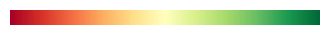

In [28]:
cm.plot_colormap('RdYlGn', width=4.0, height=0.2, orientation='horizontal',vmin =0, vmax=1,axis_off=True)

In [29]:
palette = cm.palettes.RdYlGn
vis_params = [
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3},
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3}
]



labels = [
    lb1, lb2, lb3, lb4, lb5, lb6, lb7, lb8, lb9
]

geemap.linked_maps(
    rows=3,
    cols=3,
    height="200px",
    center=[lat, lon],
    zoom=12,
    ee_objects=[ee.Image(merged_list.get(size - 9)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 8)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 7)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 6)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 5)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 4)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 3)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 2)).clip(CAR).clip(soja_potencial), ee.Image(merged_list.get(size - 1)).clip(CAR).clip(soja_potencial)],
    vis_params=vis_params,
    labels=labels,
    label_position="topright",
    
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [30]:
dataset = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterDate(start_date, end_date).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',100)).map(maskS2clouds);

dataset = dataset.filter(ee.Filter.bounds(CAR))

visualization = {
  'min': 0.0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
}

In [31]:
color_dict ={
    'T1': 'd1def8',
    'T2': 'b8d9eb',
    'T3': 'd99282',
    'T4': 'eb0000',
    'T5': 'ab0000',
    'T6': 'b3ac9f',
    'T7': '68ab5f',
    'T8': 'ccb879',
    'T9': 'b5c58f',
    'T10': 'af963c',
    'T11': '466b9f',
    'T12': '803380',
    'T13': '466b9f',
    'T14': '3CB371',
    'T15': '7B68EE',
    'T16': '00FA9A',
    'T17': '48D1CC',
    'T18': 'C71585',
    'T19': 'E3A869',
    'T20': '191970'
}

In [32]:
#n_talhoes = talhoesFc.size().getInfo()
talhoes = pd.read_sql_query('select talhao, classe, st_asgeojson(geom) as geom, ST_Area(ST_Transform(geom, 26986))/10000\
as h from monitoramento.{0}_parcels'.format(t),con=engine)

In [33]:
area = talhoes[['talhao', 'h']].set_index('talhao')
area.columns = ['áera (hectares)']
area

áera (hectares)
talhao                 
1             45.664359
2             47.469395
3           1002.173552
4            138.099467
5            287.127101
6             43.482286
7            302.676658
8            346.751328
9            293.725550
10            68.197335
11            44.155531
12           714.628879

In [34]:
Map = geemap.Map()
legend_dict = {}

for i in range(1,len(talhoes)+1):
    talhao = talhoes.loc[talhoes['talhao'] == i]
    gdf = gpd.read_file(str(talhao['geom'][i-1]), driver='GeoJSON')
    geo_json = gdf.to_json()
    j = json.loads(geo_json)
    #j['features'][0]['properties']
    # for k in range(len(j["features"])):
    #     del j["features"][k]['properties']

    talhaoFc = ee.FeatureCollection(j)
    #talhao = i + 1
    k = "T" + str(i)

    Map.addLayer(talhaoFc, {'color':color_dict[k]}, k )
    legend_dict[k] = color_dict[k]

Map.add_legend(legend_title="id_talhao", legend_dict=legend_dict)
Map.centerObject(talhaoFc,12)
Map.addLayer(car_edge ,{}, "CAR")
Map

Map(center=[-12.340389066065534, -49.011133483201036], controls=(WidgetControl(options=['position', 'transpare…

In [35]:
# Map = geemap.Map()
# Map.centerObject(talhoesFc,12)

# legend_dict = {}

# for i in range(0, n_talhoes):
#     talhao = i + 1
#     k = "T" + str(talhao)
    
#     Map.addLayer(talhoesFc.filter(ee.Filter.eq('id_talhao',i)), {'color':color_dict[k]}, k )
#     legend_dict[k] = color_dict[k]

# Map.add_legend(legend_title="id_talhao", legend_dict=legend_dict)
# Map.addLayer(car_edge ,{}, "CAR")
# Map

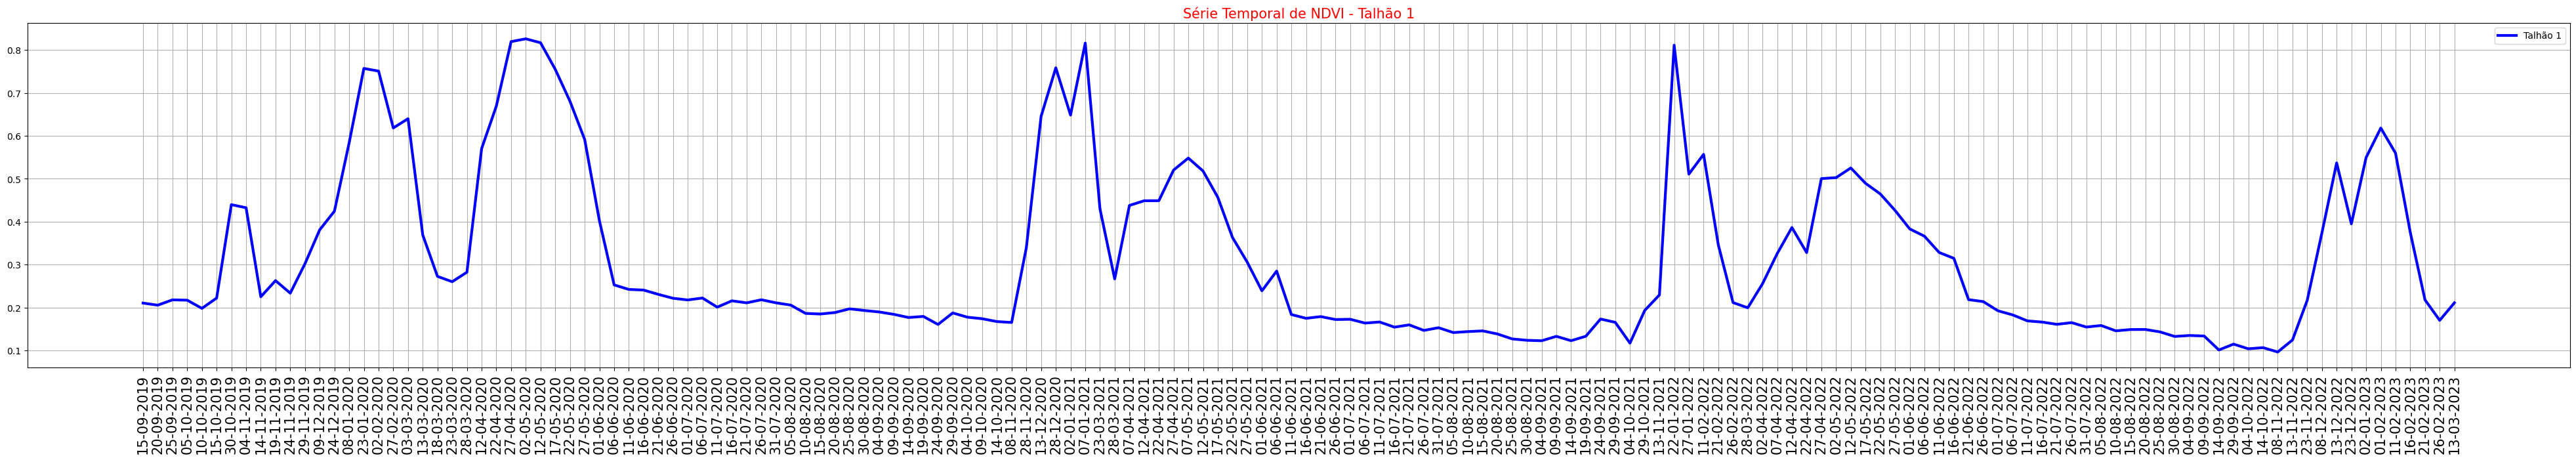

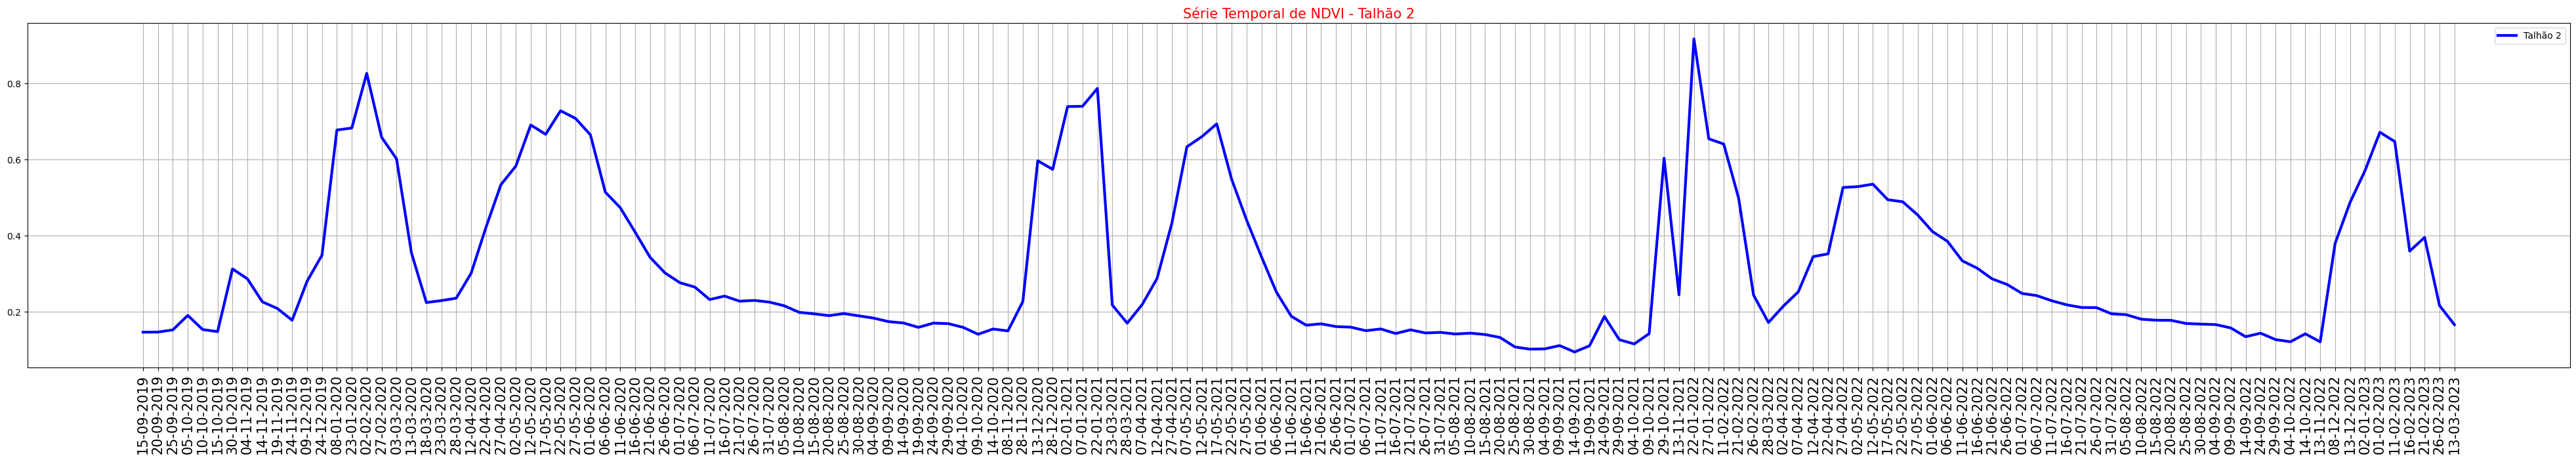

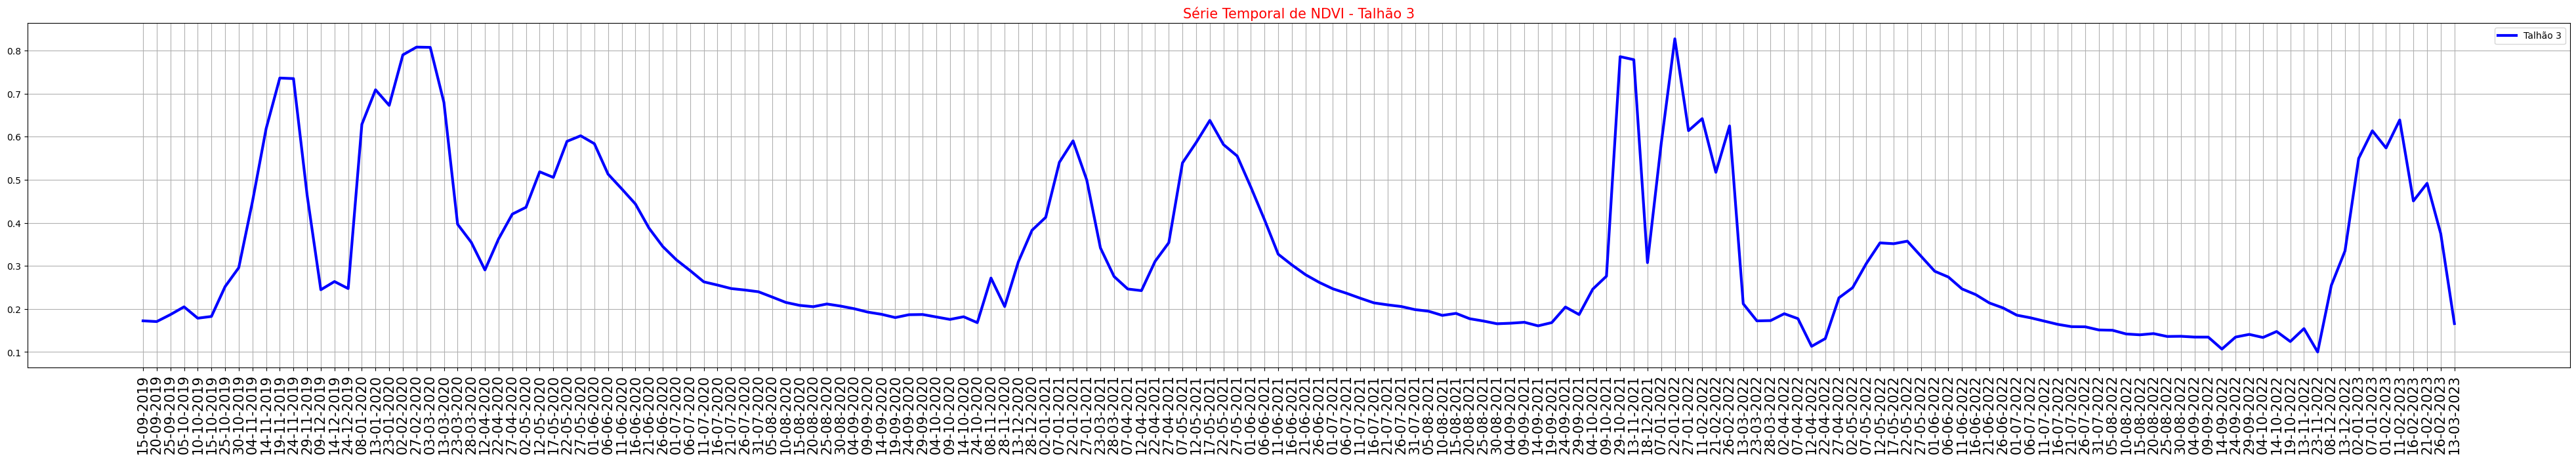

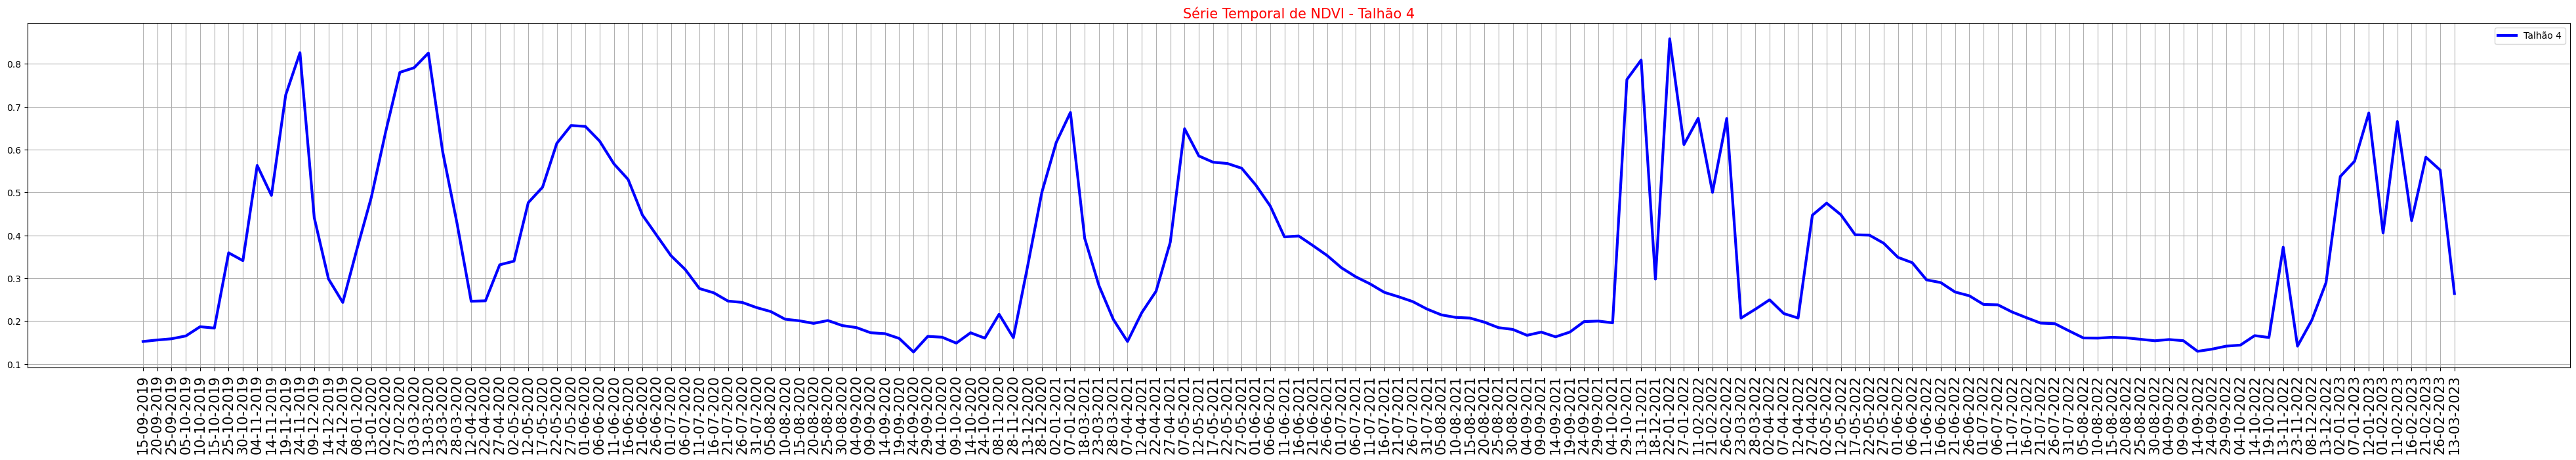

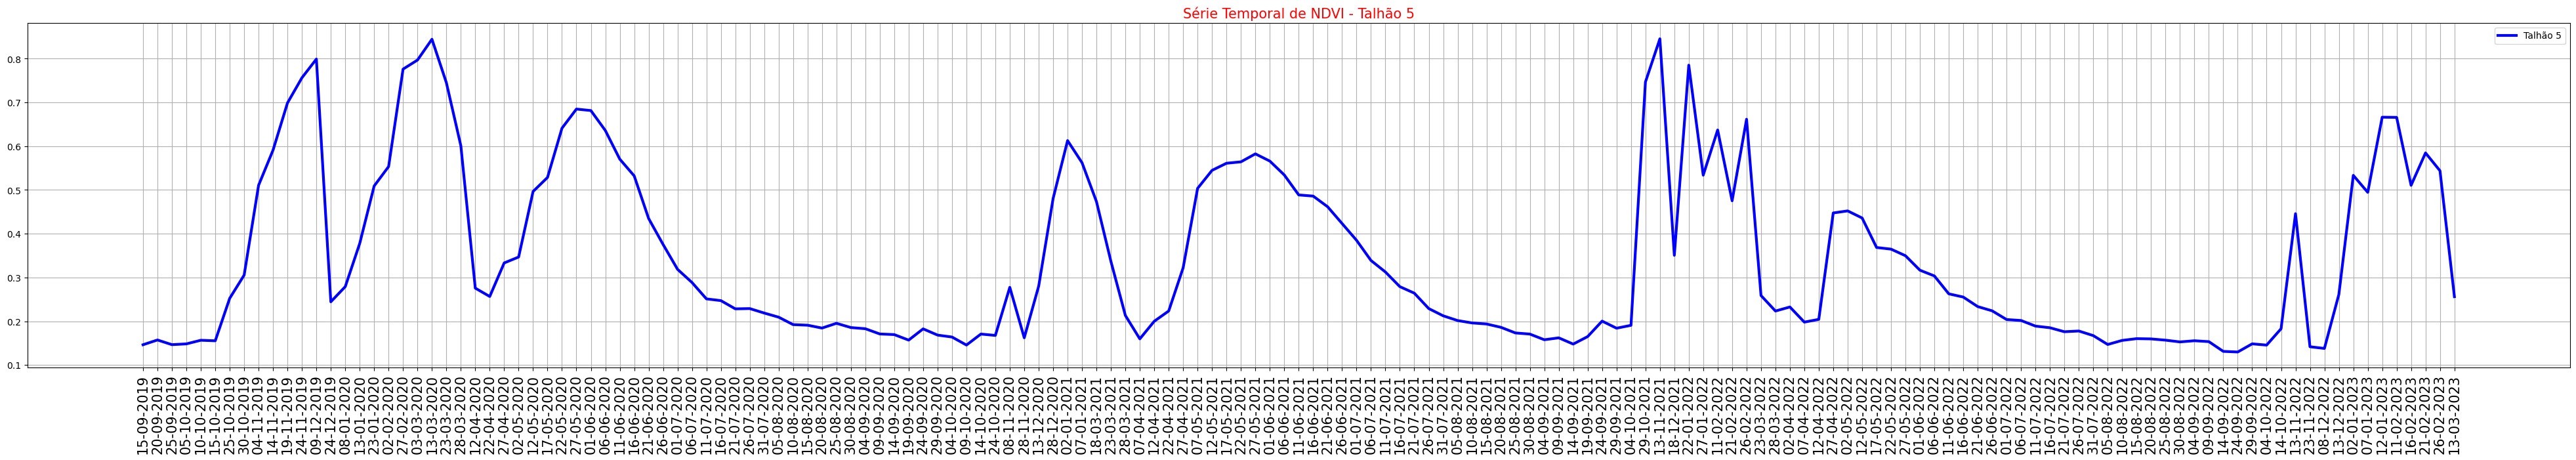

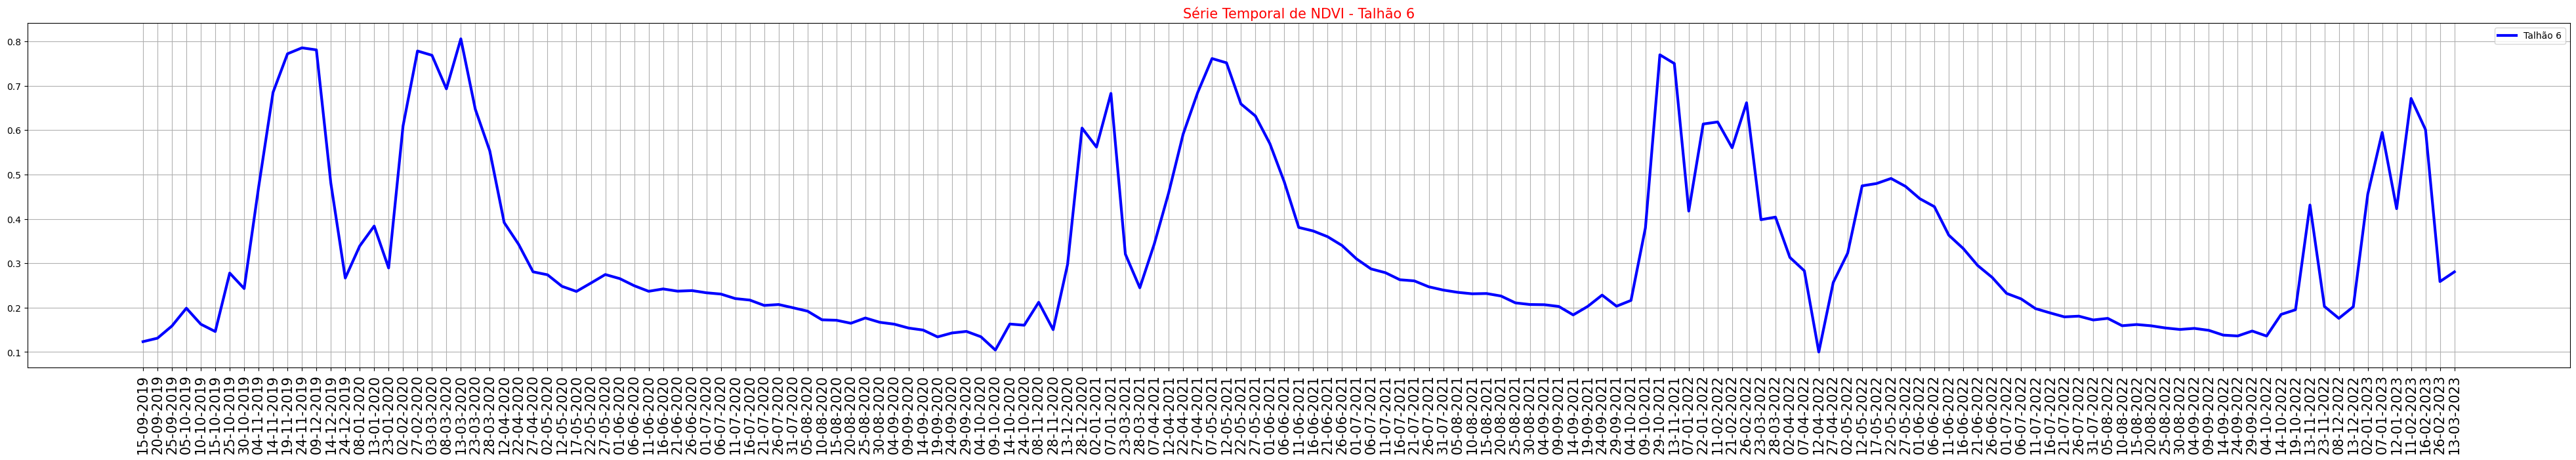

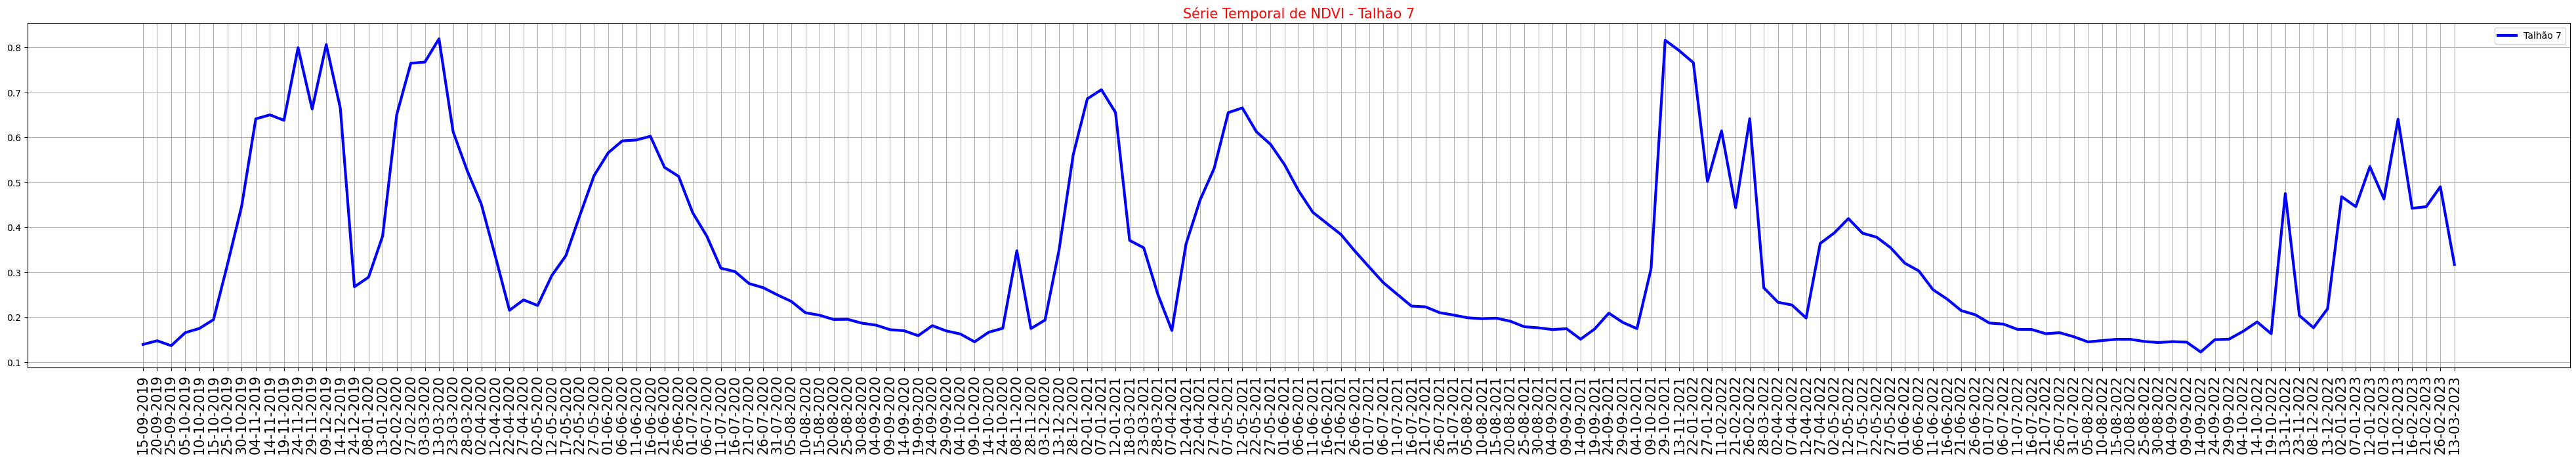

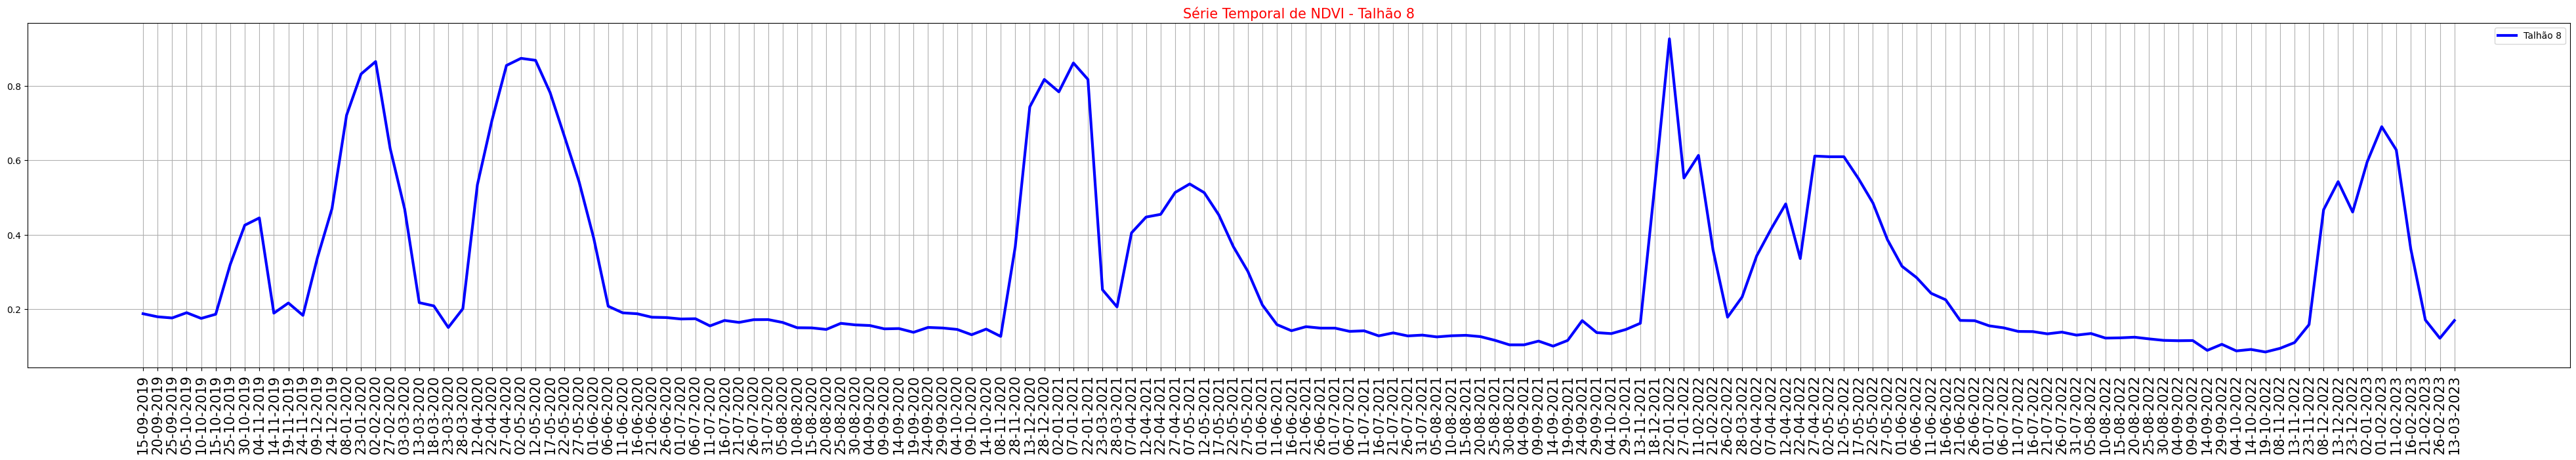

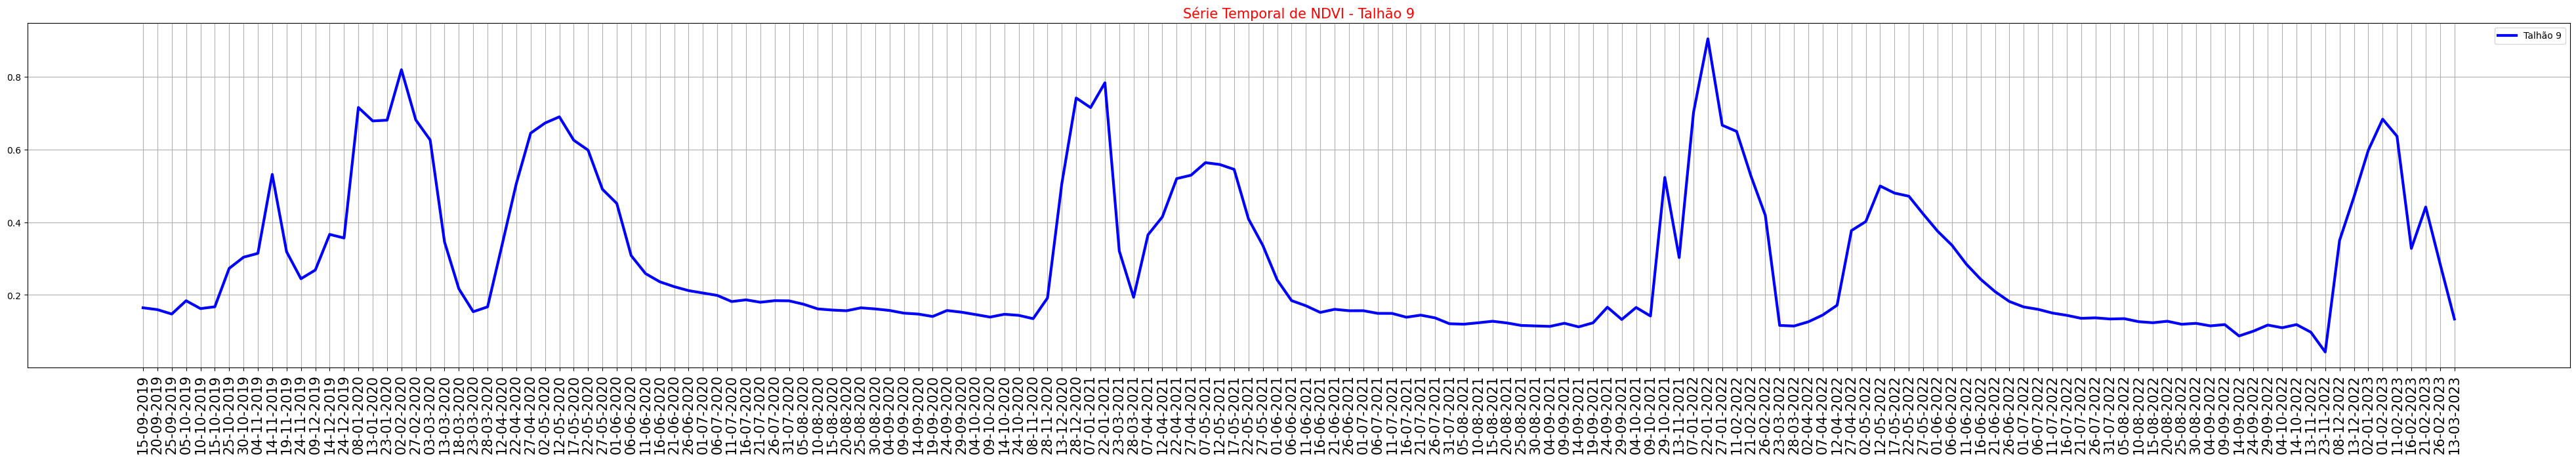

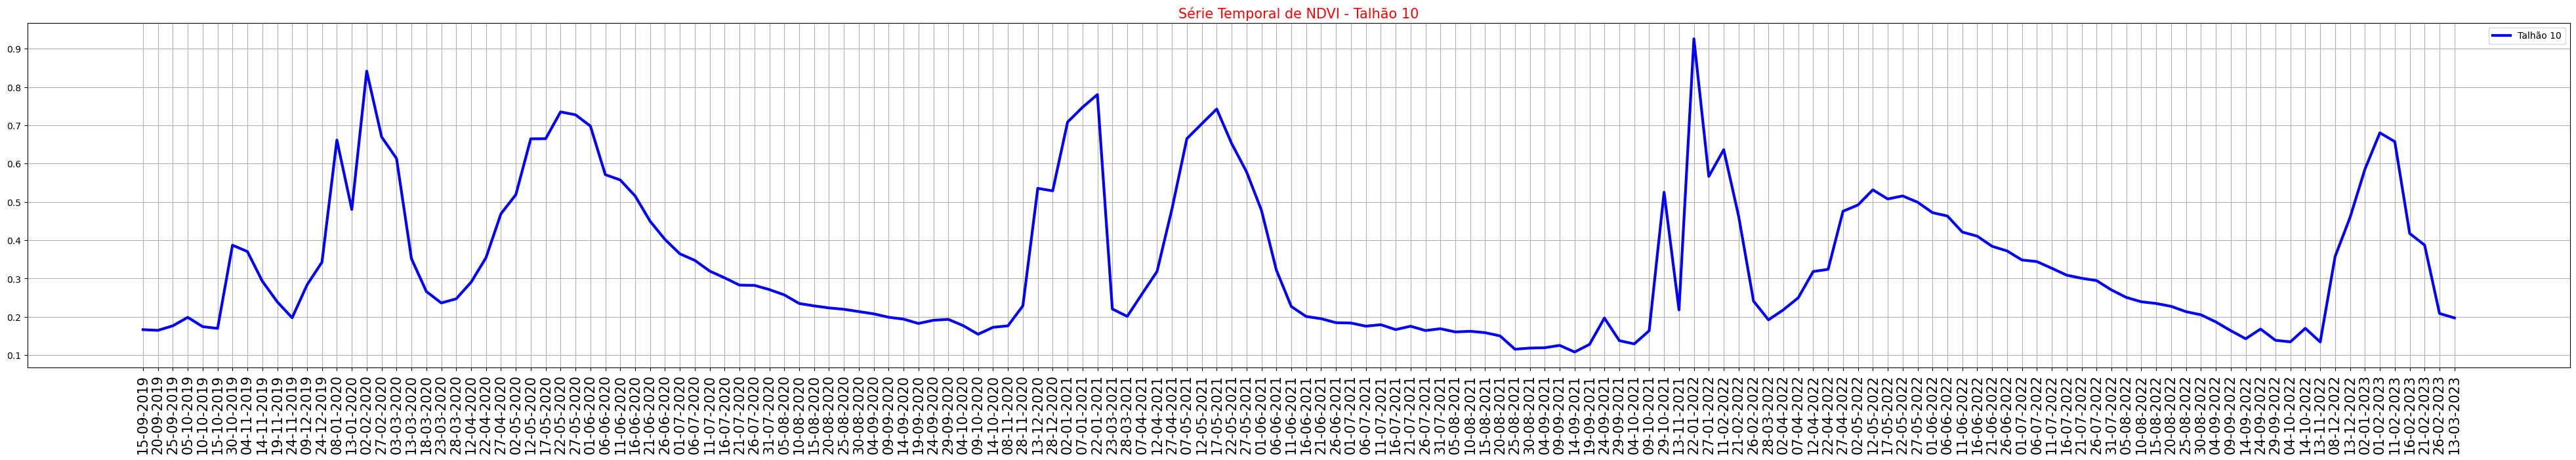

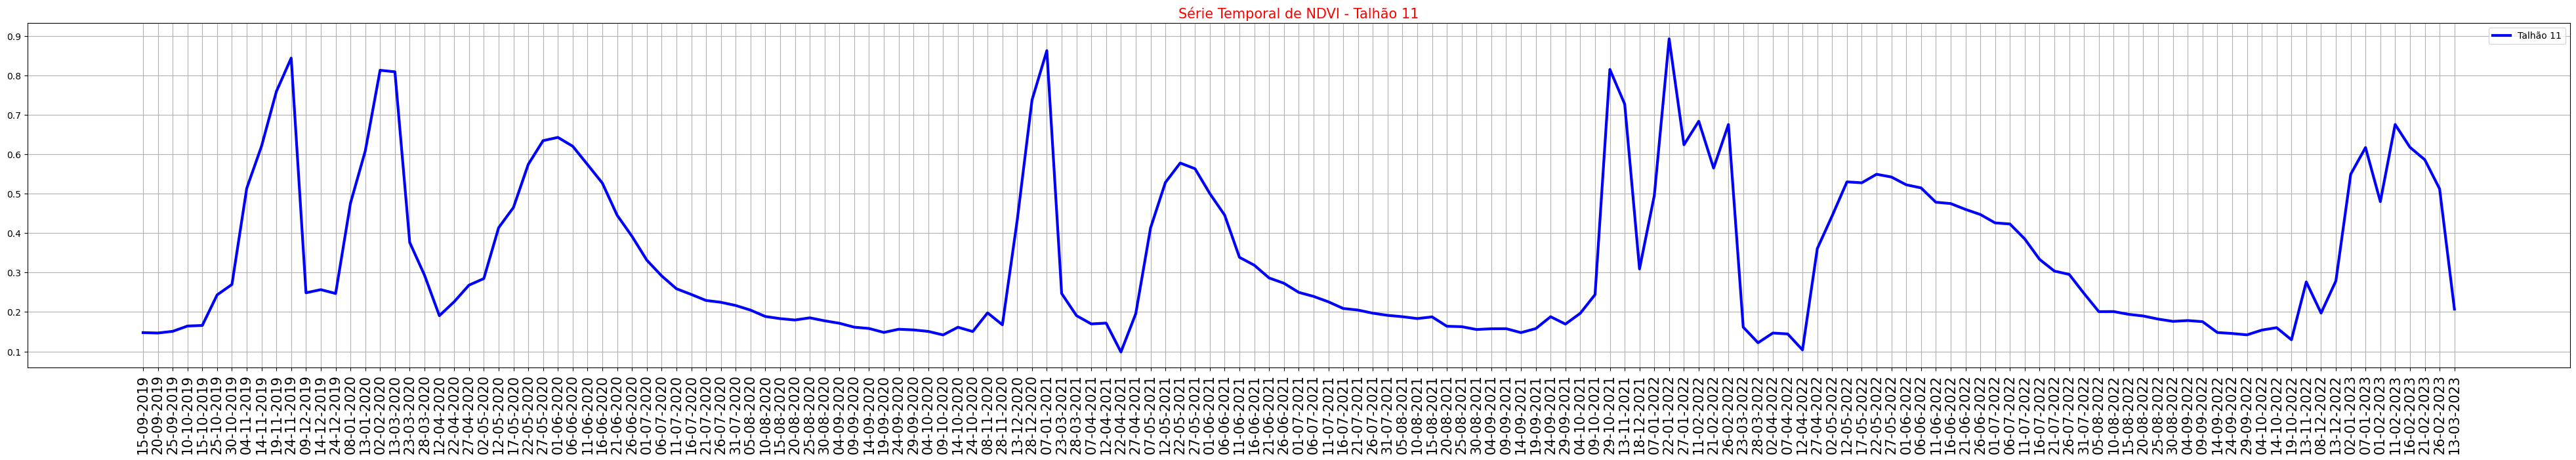

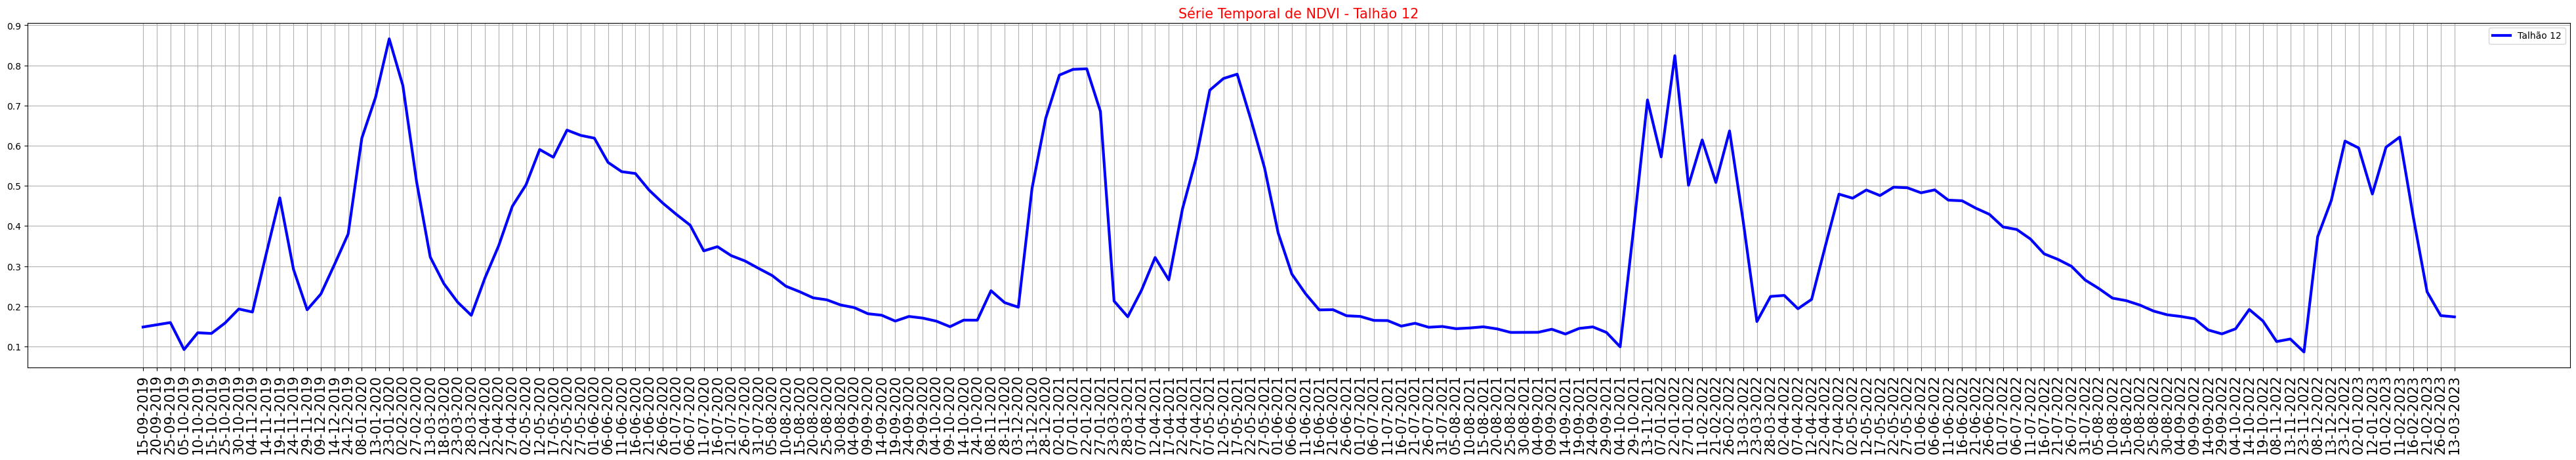

In [36]:
user = 'ferraz'
password = '3ino^Vq3^R1!'
host = 'vps40890.publiccloud.com.br'
port = 5432
database = 'carbon'

engine = create_engine(
        url="postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )

t = cod.replace('-', '').lower()
ts_ndvi = pd.read_sql_query('select * from monitoramento.{0}_index'.format(t),con=engine)

for i in range(1, len(talhoes)+1):
    dataset = ts_ndvi[ts_ndvi['talhao'] == i]
    
    s = (pd.to_datetime(dataset['date'])).dt.strftime('%d-%m-%Y')
    x = s.to_numpy()
    y = dataset['ndvi'].to_numpy()
    #y_smooth = signal.savgol_filter(y, window_length=5, polyorder=3, mode="nearest")
    #dataset = pd.DataFrame({'x': x, 'y': y}, columns=['x', 'y'])
    #return dataset

    plt.figure(figsize=(50, 15))
    plt.subplot(2,1,1)
    #plt.plot(x, y, label="y_serie_bruta")
    plt.plot(x, y, linewidth=3, color = 'blue', label="Talhão " + str(i))
    plt.legend()
    plt.grid(True)
    plt.title("Série Temporal de NDVI - Talhão " + str(i), fontsize = 15, color = 'red')
    plt.xticks(fontsize=15, color = 'black', rotation=90)
    ax = plt.gca()
    every_nth = 1
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    #plt.savefig(r'C:\Users\jabre\Documents\merx\AnaliseCredito\Financiadas\CARLOS_GUILHERME\TO-1720978-B722E607B52342A7B7A8927D857C6F8D\NDVI\NDVI_todos.png', bbox_inches='tight')
    plt.show()

### Variáveis Climáticas

In [37]:
today = date.today()
yesterday = date.today() - timedelta(days = 1)
start_date = '2022-10-01' 

In [38]:
ts_climate = pd.read_sql_query('select * from monitoramento.{0}_climate'.format(t),con=engine)

In [39]:
temp_mask = business.get_temperature_data(CAR, start_date, today.strftime('%Y-%m-%d'))

In [40]:
ts_temperatura = ts_climate[['data', 'temperatura']]

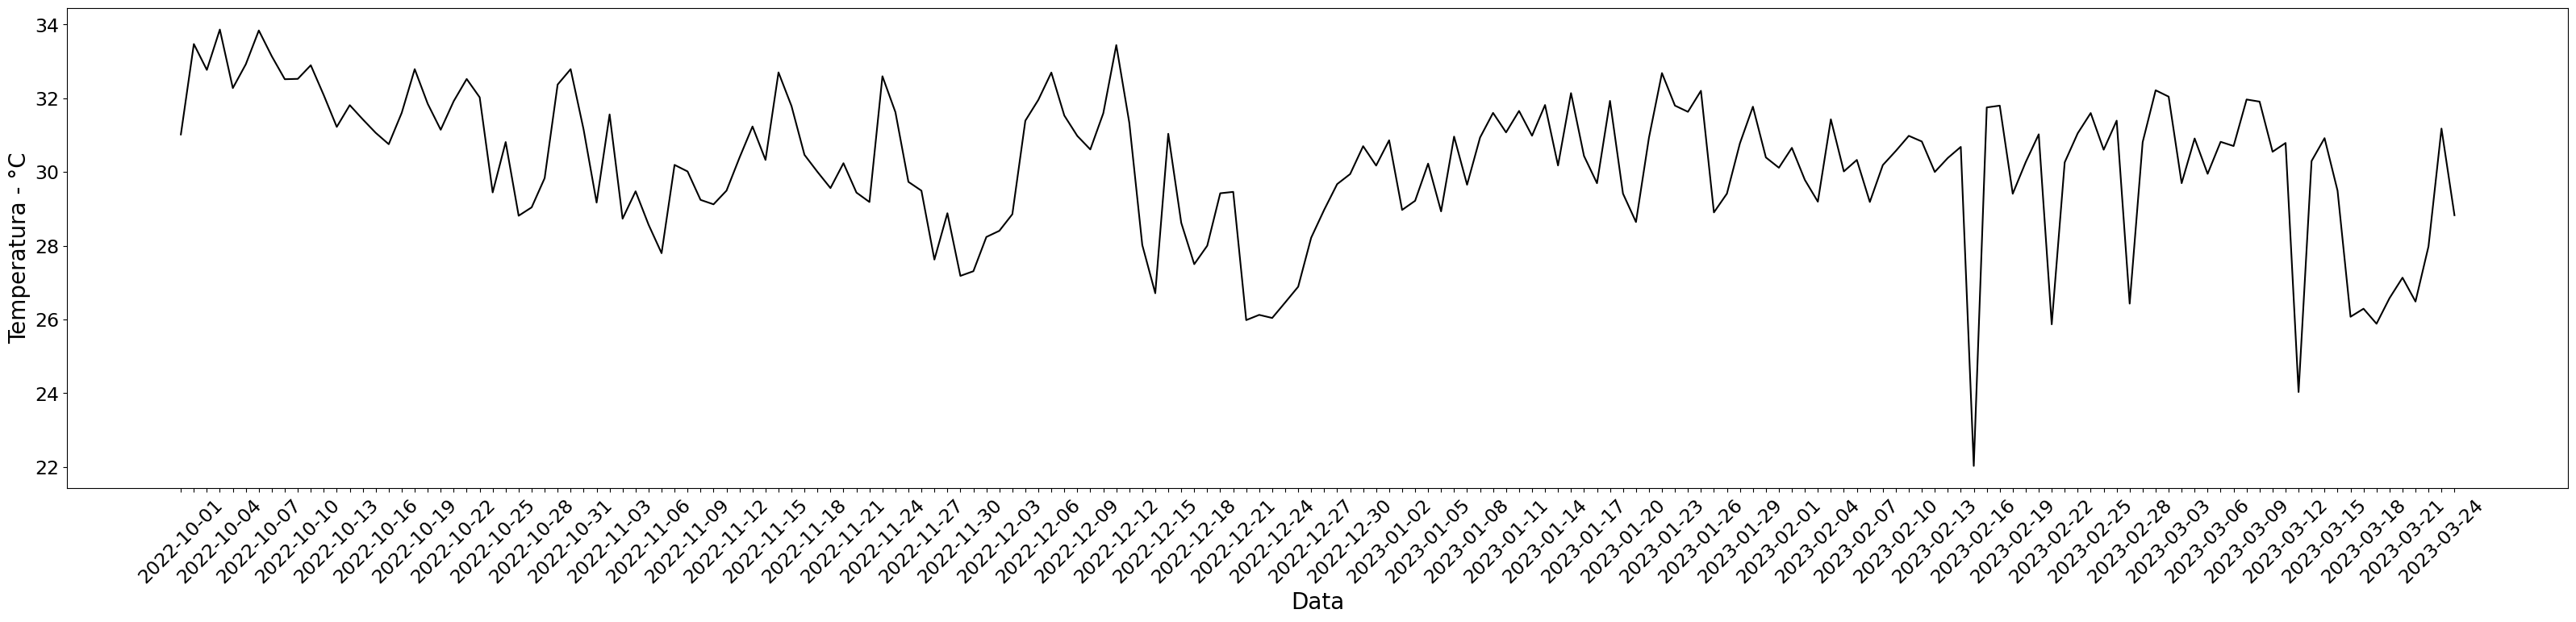

In [41]:
plt.figure(figsize = (40,17))
plt.subplot(2, 1, 1)
p = sns.lineplot(data = ts_temperatura[:-1],
                 color='black',
                 x = 'data',
                 y = 'temperatura')
plt.ylabel('Temperatura - °C', color = 'black', fontsize = 20)  
plt.xlabel('Data', color = 'black', fontsize = 20)
plt.yticks(fontsize=17, color = 'black')
plt.xticks(fontsize=17, color = 'black', rotation = 45)
ax = plt.gca()
every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.show()

In [42]:
ppt = business.get_precipitation_data(start_date,yesterday.strftime('%Y-%m-%d'), CAR)

In [43]:
pd_ts_ppt_sum = ts_climate[['data', 'hourlypreciprate']]
pd_ts_ppt_sumcum = ts_climate[['data', 'sumcum']]
pd_ts_ppt_sumcum['MM-DD'] = pd_ts_ppt_sumcum['data'].str[5:]
pd_ts_ppt_sum['MM-DD'] = pd_ts_ppt_sum['data'].str[5:]
#pd_ts_ppt_sumcum['MM-DD']

In [44]:
date_time_obj = datetime.strptime(pd_ts_ppt_sum['data'][len(pd_ts_ppt_sum)-1], '%Y-%m-%d')
date_time_obj = date_time_obj + timedelta(days = 1)

sum_hist = business.get_sum_hist(start_date,date_time_obj.strftime('%Y-%m-%d'), CAR)

In [45]:
ppt_sumcum = pd.merge(pd_ts_ppt_sumcum, sum_hist.reset_index(),on=['MM-DD'],how='inner')

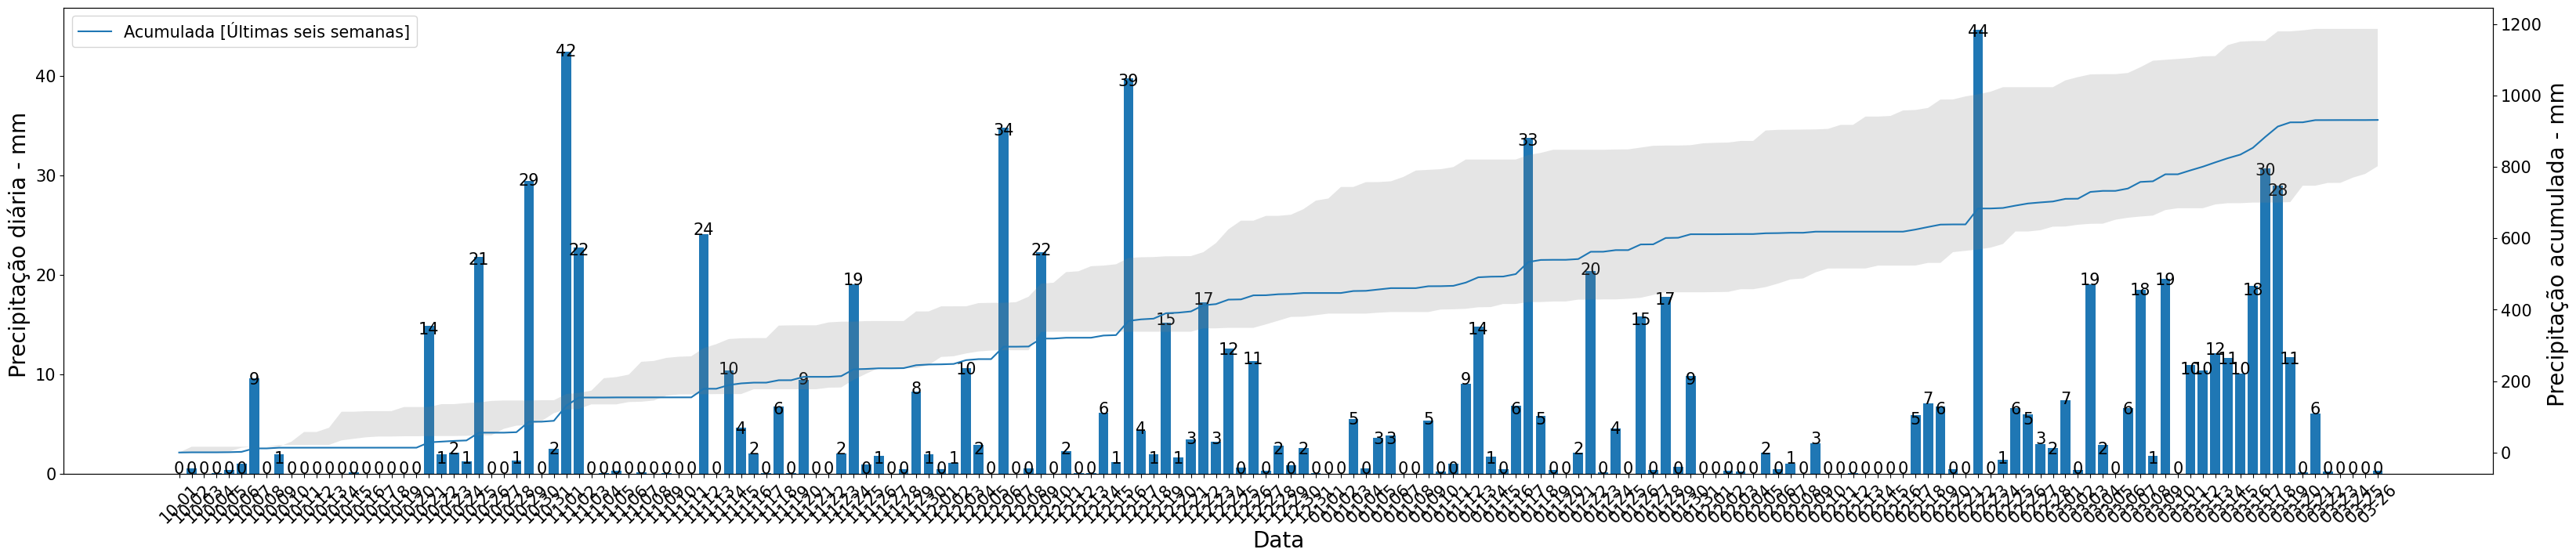

In [46]:
business.plot_precipitation_data_sum(pd_ts_ppt_sum, ppt_sumcum)

In [47]:
q  = "select * from water_balance.water_balance_week where estacao = (select est.estacao from\
(select ST_Distance(ST_SetSRID(ST_MakePoint(long::decimal, lat::decimal), 4326)\
,ST_SetSRID(ST_MakePoint('{0}', '{1}'), 4326))\
as dist, estacao FROM water_balance.water_balance_week order by dist asc limit 1)\
est);".format(lon, lat)

ts_penalize = pd.read_sql_query(q,con=engine)

ts_penalize['DATA'] = pd.to_datetime(ts_penalize['DATA'], format='%Y-%b-%d')

ts_penalize = ts_penalize[ts_penalize['DATA'] > datetime.strptime(start_date, '%Y-%m-%d')]

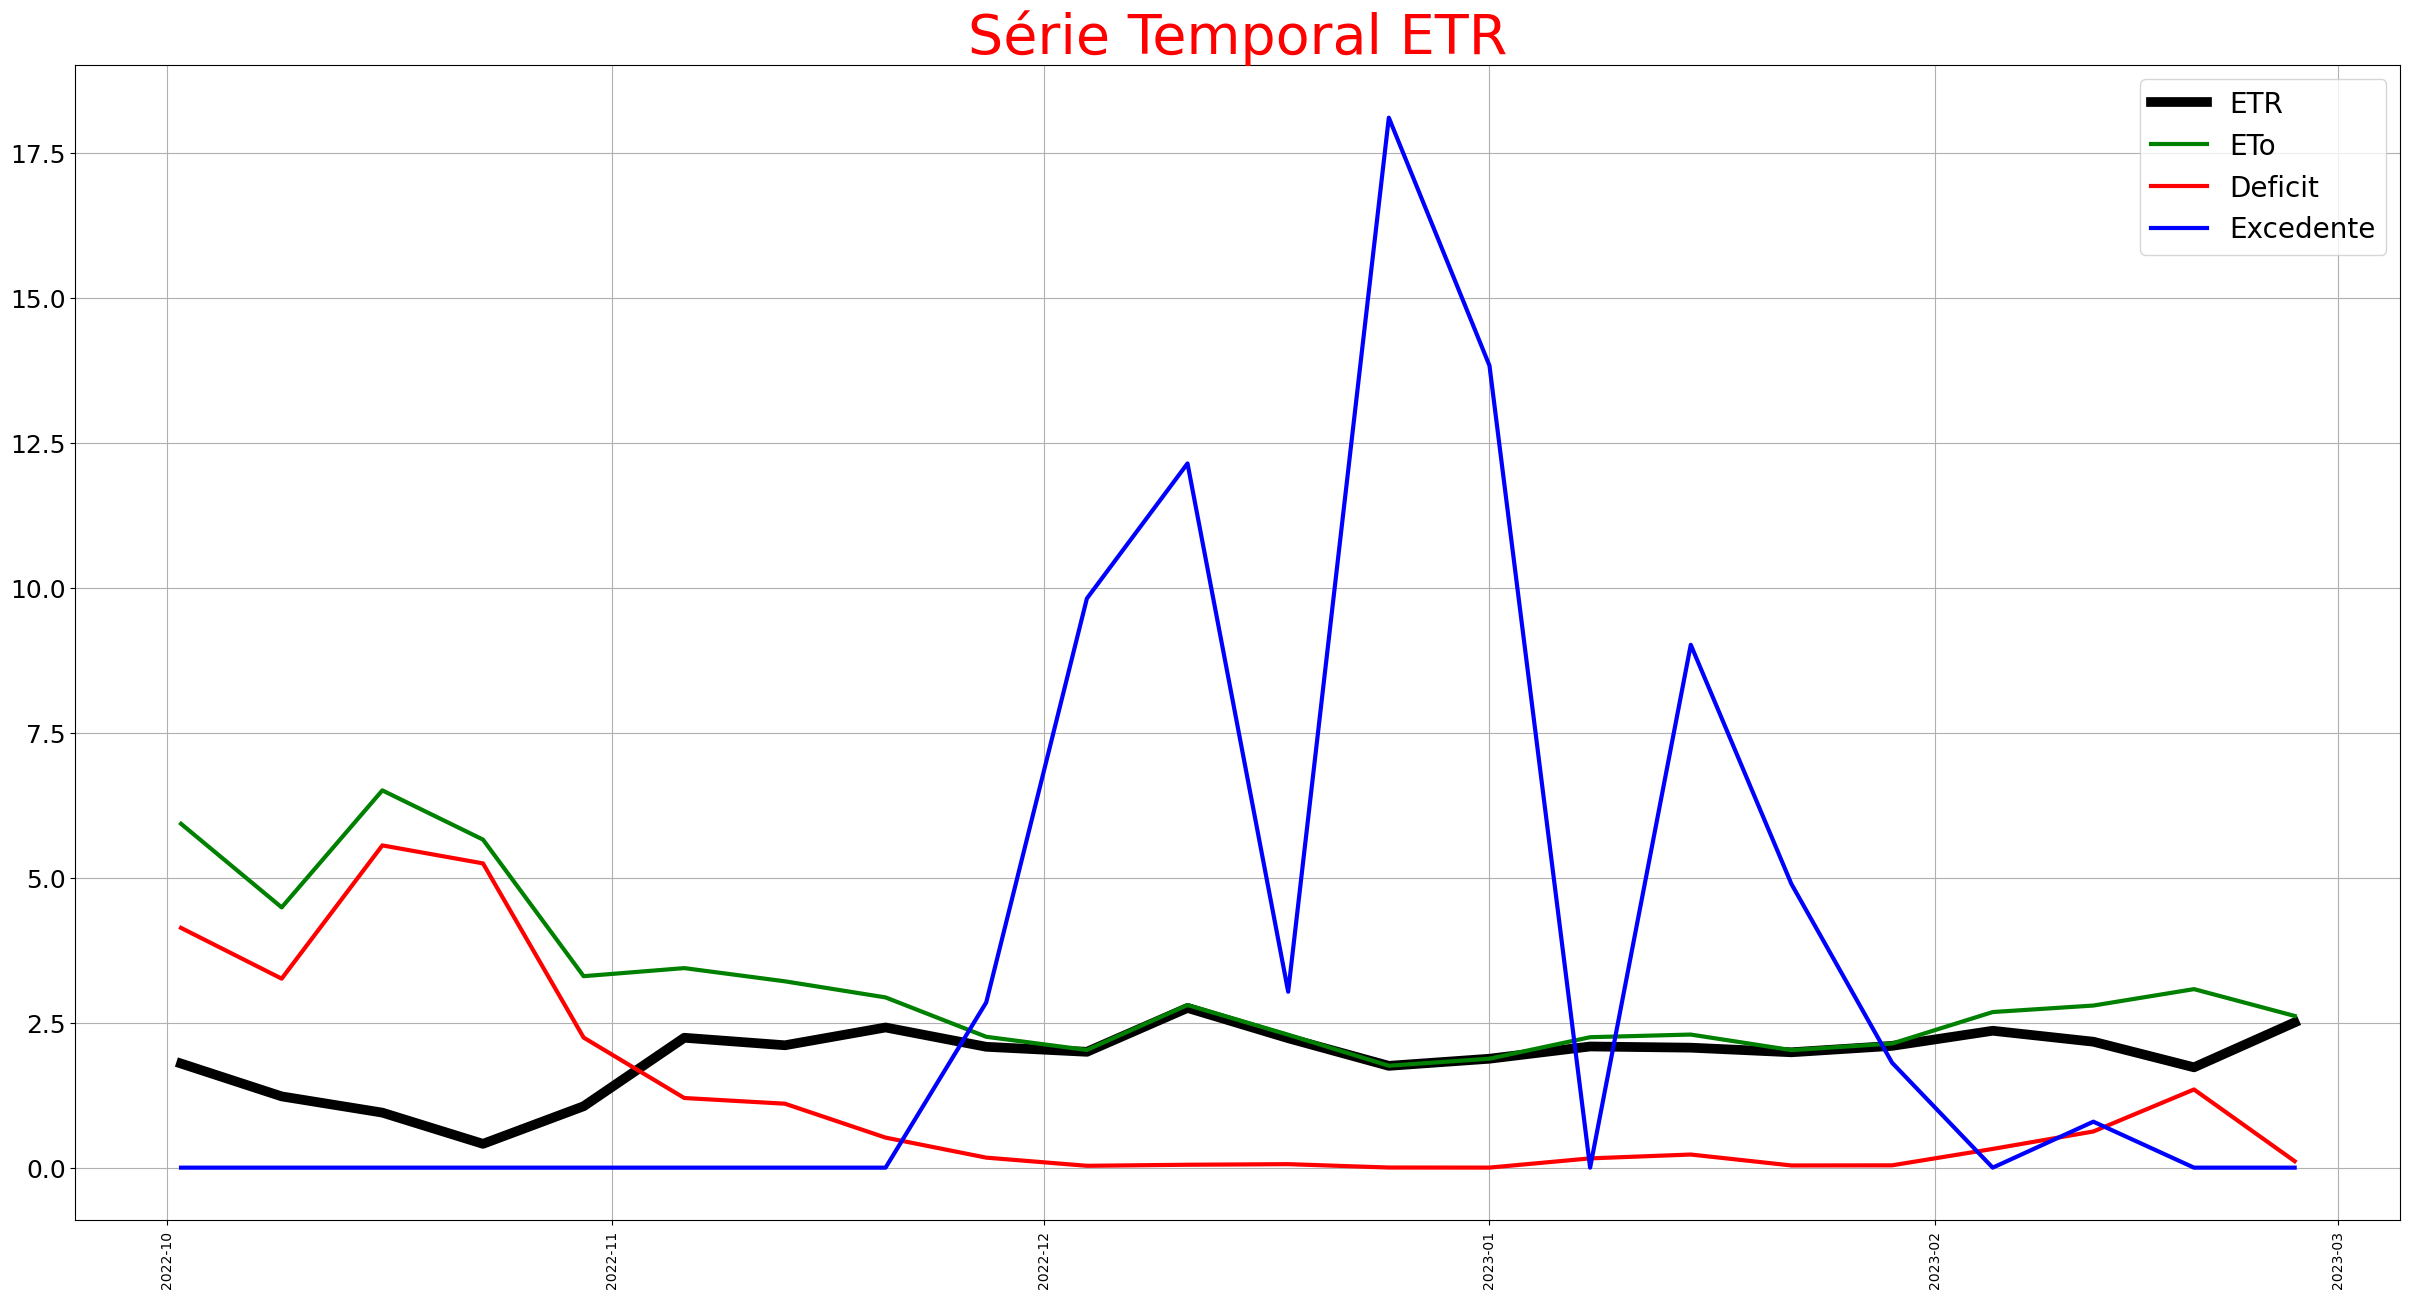

In [48]:
s = ts_penalize['DATA']
x = s.to_numpy()
y = ts_penalize['ETo'].to_numpy()
y2 = ts_penalize['Deficit'].to_numpy()
y3 = ts_penalize['Excedente'].to_numpy()
y4 = ts_penalize['ETR'].to_numpy()
#y_smooth = signal.savgol_filter(y, window_length=5, polyorder=3, mode="nearest")
#dataset = pd.DataFrame({'x': x, 'y': y}, columns=['x', 'y'])
#return dataset

plt.figure(figsize=(30, 15))
#plt.subplot(2,1,1)
#plt.plot(x, y, label="y_serie_bruta")
plt.plot(x, y4, linewidth=7, color = 'black', label="ETR")
plt.plot(x, y, linewidth=3, color = 'green', label="ETo")
plt.plot(x, y2, linewidth=3, color = 'red', label="Deficit")
plt.plot(x, y3, linewidth=3, color = 'blue', label="Excedente")
plt.legend(fontsize=20)
plt.grid(True)
plt.title("Série Temporal ETR", fontsize = 40, color = 'red')
plt.xticks(fontsize=10, color = 'black', rotation=90)
plt.yticks(fontsize=18, color = 'black')
ax = plt.gca()
# every_nth = 4
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
#plt.savefig(r'C:\Users\jabre\Documents\merx\AnaliseCredito\Financiadas\CARLOS_GUILHERME\TO-1720978-B722E607B52342A7B7A8927D857C6F8D\NDVI\NDVI_todos.png', bbox_inches='tight')
plt.show()

In [49]:
user = 'ferraz'
password = '3ino^Vq3^R1!'
host = 'vps40890.publiccloud.com.br'
port = 5432
database = 'carbon'
cdmun = cod.split('-')[1]

engine = create_engine(
        url="postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )

q = "SELECT * FROM ibge.produtividade_historica where codmun = '{0}';".format(cdmun)
pam = pd.read_sql_query(q,con=engine)

pam = pam[[ '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021']]

sorted_df = pam.sort_values(pam.last_valid_index(), axis=1)

import seaborn as sns
palette = sns.color_palette('RdYlGn', 9)

colors = {}
for i in range(len(sorted_df.columns)):
    colors[sorted_df.columns[i]] = palette.as_hex()[i]

In [50]:
low_y = sorted_df.iloc[0][0:3].index.to_list()
low_y.insert(0,'mm_dd')
high_y = sorted_df.iloc[0][6:9].index.to_list()
high_y.insert(0,'mm_dd')

In [51]:
user = 'ferraz'
password = '3ino^Vq3^R1!'
host = 'vps40890.publiccloud.com.br'
port = 5432
database = 'carbon'

engine = create_engine(
        url="postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )
#cdmun = cod.split('-')[1]
q = "select * from climate_mun.ppt_{0}".format(cdmun)

ppt_mun = pd.read_sql_query(q,con=engine)

In [52]:
high_safras_ppt = ppt_mun[ppt_mun.columns.intersection(high_y)]
low_safras_ppt = ppt_mun[ppt_mun.columns.intersection(low_y)]

In [53]:
ppt_mun['mean'] = ppt_mun.mean(axis=1)
ppt_mun['median'] = ppt_mun.median(axis=1)
ppt_mun['max'] = ppt_mun.max(axis=1)
ppt_mun['min'] = ppt_mun.min(axis=1)
ppt_mun['std'] = ppt_mun.std(axis=1)

high_safras_ppt['mean'] = high_safras_ppt.mean(axis=1)
low_safras_ppt['mean'] = low_safras_ppt.mean(axis=1)

In [54]:
right = pd_ts_ppt_sum[['MM-DD','hourlypreciprate']]
right.columns = ['mm_dd','hourlypreciprate']

In [55]:
ppt_comp = ppt_mun.merge(right, on='mm_dd', how ='left')
high_comp = high_safras_ppt.merge(right, on='mm_dd', how ='left')
low_comp = low_safras_ppt.merge(right, on='mm_dd', how ='left')

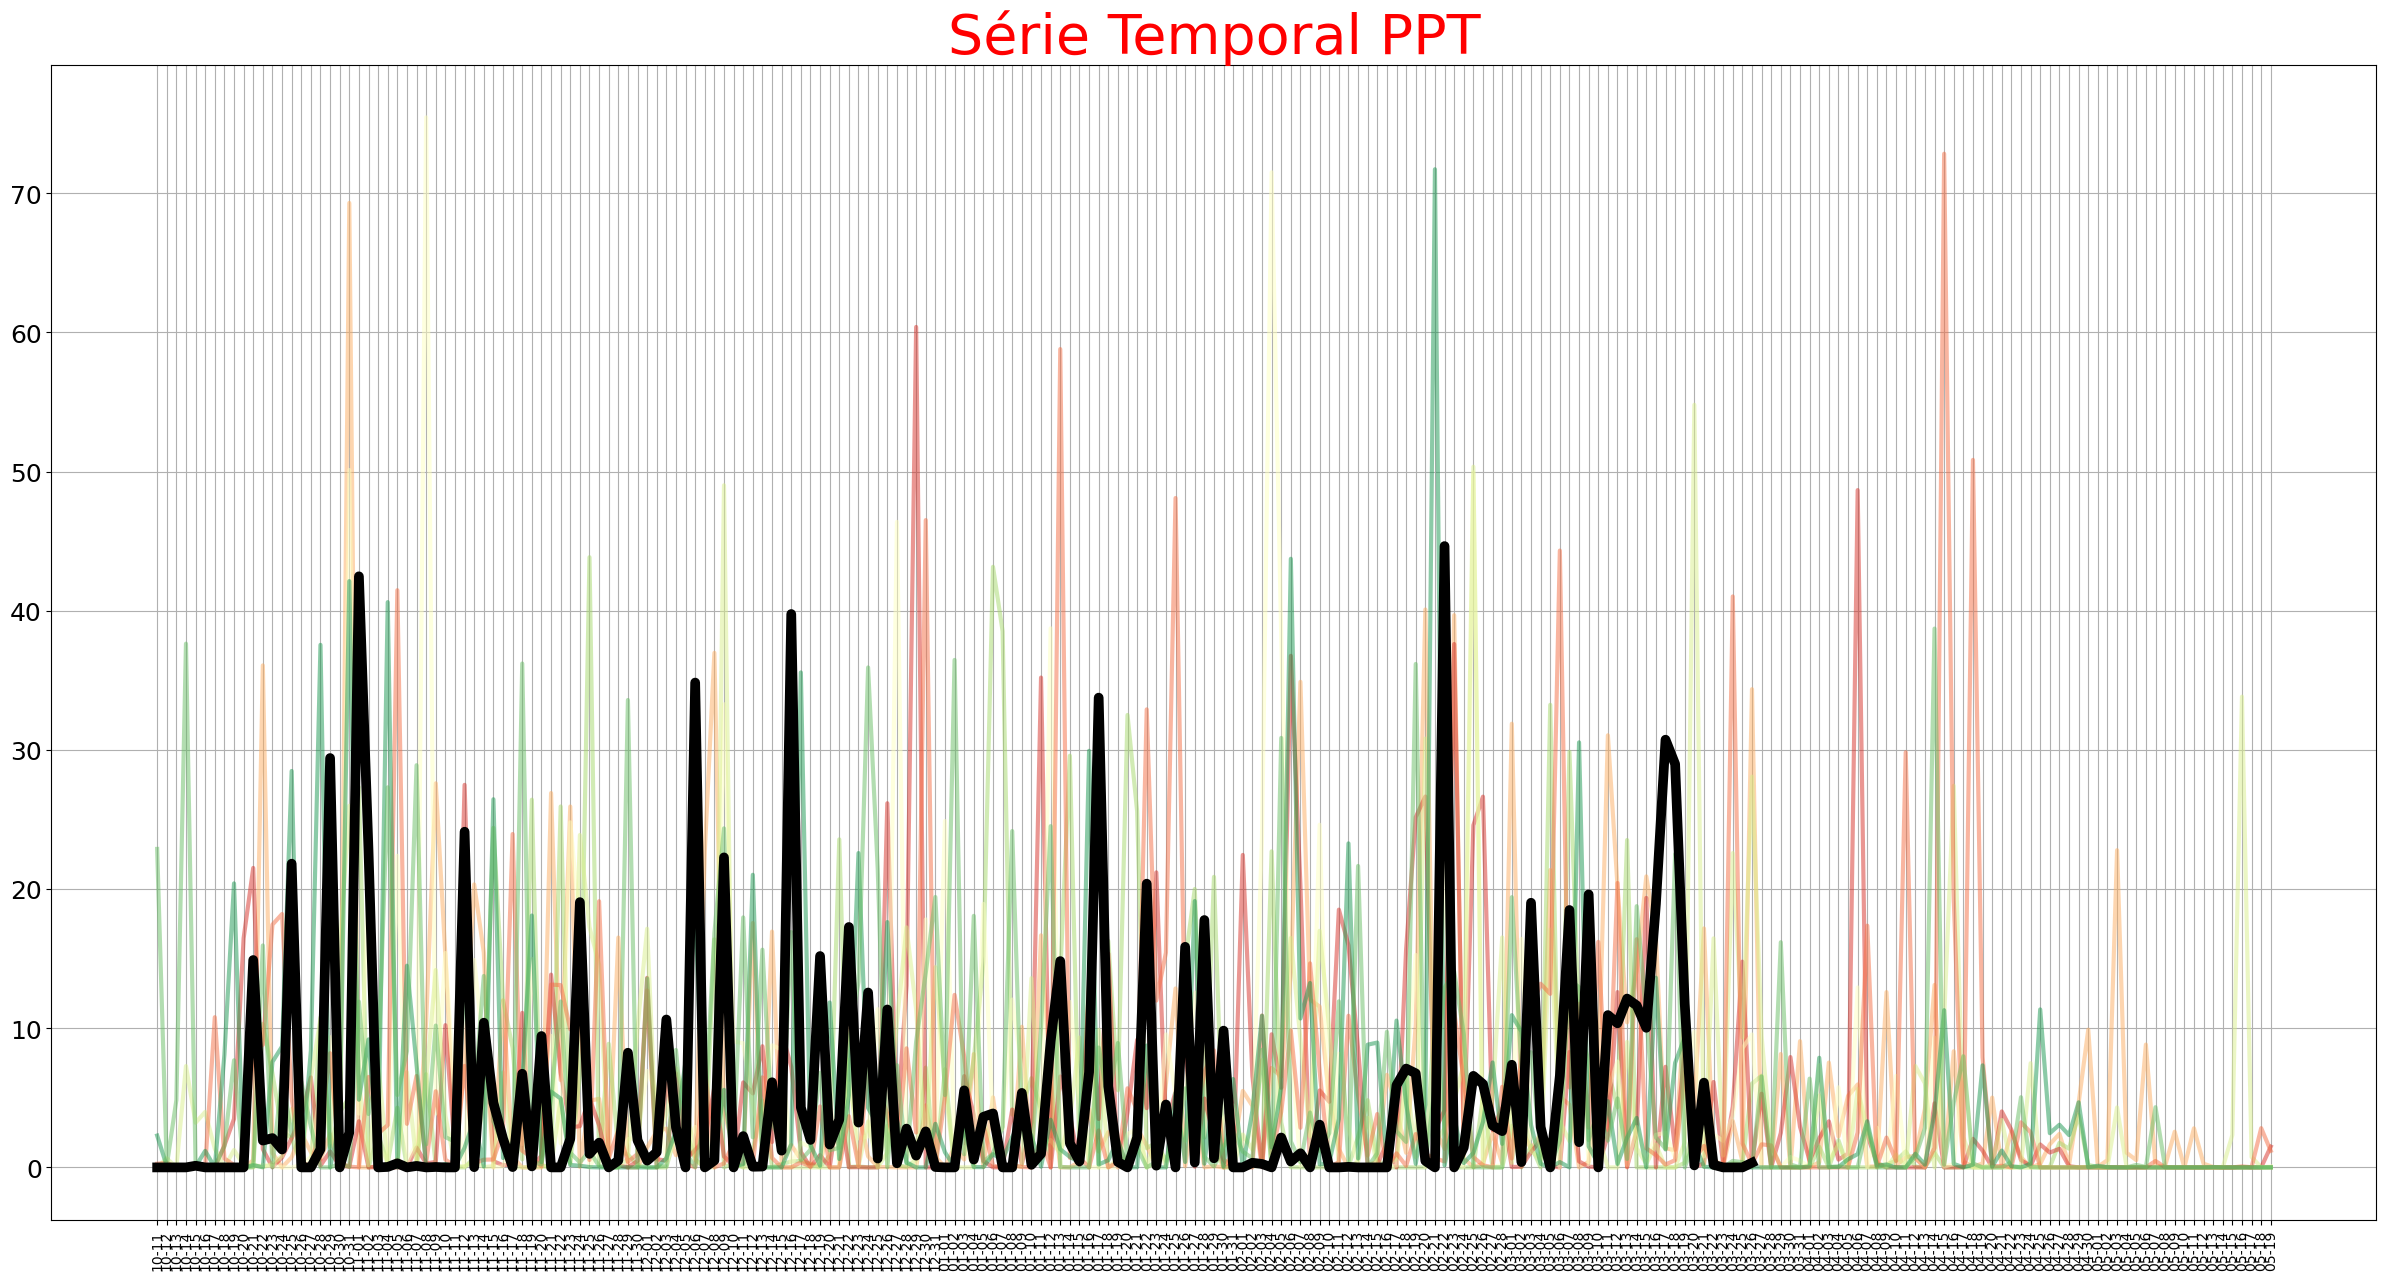

In [56]:
s = ppt_comp['mm_dd']
x = s.to_numpy()
y = ppt_comp['2014'].to_numpy()
y2 = ppt_comp['2015'].to_numpy()
y3 = ppt_comp['2016'].to_numpy()
y4 = ppt_comp['2017'].to_numpy()
y5 = ppt_comp['2018'].to_numpy()
y6 = ppt_comp['2019'].to_numpy()
y7 = ppt_comp['2020'].to_numpy()
y8 = ppt_comp['2021'].to_numpy()
target = ppt_comp['hourlypreciprate'].to_numpy()

plt.figure(figsize=(30, 15))
#plt.subplot(2,1,1)
#plt.plot(x, y, label="y_serie_bruta")

plt.plot(x, y, linewidth=3, color = colors['2014'], alpha = 0.5)
plt.plot(x, y2, linewidth=3, color = colors['2015'], alpha = 0.5)
plt.plot(x, y3, linewidth=3, color = colors['2016'], alpha = 0.5)
plt.plot(x, y4, linewidth=3, color = colors['2017'], alpha = 0.5)
plt.plot(x, y5, linewidth=3, color = colors['2018'], alpha = 0.5)
plt.plot(x, y6, linewidth=3, color = colors['2019'], alpha = 0.5)
plt.plot(x, y7, linewidth=3, color = colors['2020'], alpha = 0.5)
plt.plot(x, y8, linewidth=3, color = colors['2021'], alpha = 0.5)
plt.plot(x, target, linewidth=7, color = 'black', label="Current year")
plt.grid(True)
plt.title("Série Temporal PPT", fontsize = 40, color = 'red')
plt.xticks(fontsize=10, color = 'black', rotation=90)
plt.yticks(fontsize=18, color = 'black')
ax = plt.gca()
# every_nth = 4
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
#plt.savefig(r'C:\Users\jabre\Documents\merx\AnaliseCredito\Financiadas\CARLOS_GUILHERME\TO-1720978-B722E607B52342A7B7A8927D857C6F8D\NDVI\NDVI_todos.png', bbox_inches='tight')
plt.show()

In [57]:
stats = ppt_comp[['hourlypreciprate', 'mean','median', 'max', 'min', 'std']]

c =stats[(stats['hourlypreciprate']>(stats['median'] + stats['std'])) | (stats['hourlypreciprate']<(stats['median'] - stats['std']))].count()

print(str(round((c.iloc[0]/len(stats[stats['hourlypreciprate'] > -1]))*100, 2))\
      + "% dos dias durante o ciclo foram considerados outliers em relação aos dados históricos de precipitação")

c_h = high_comp[(high_comp['hourlypreciprate']<high_comp['mean'])].count()

print(str(round(c_h.iloc[0]/len(high_comp[high_comp['hourlypreciprate'] > -1])*100, 2)) \
      + "% dos dias durante o ciclo estiveram abaixo da média de precipitação das safras com alta produtividade")

c_l = low_comp[(low_comp['hourlypreciprate']<low_comp['mean'])].count()

print(str(round(c_l.iloc[0]/len(low_comp[low_comp['hourlypreciprate'] > -1])*100, 2)) \
      + "% dos dias durante o ciclo estiveram abaixo da média de precipitação das safras com baixa produtividade")

19.16% dos dias durante o ciclo foram considerados outliers em relação aos dados históricos de precipitação
64.07% dos dias durante o ciclo estiveram abaixo da média de precipitação das safras com alta produtividade
66.47% dos dias durante o ciclo estiveram abaixo da média de precipitação das safras com baixa produtividade


In [58]:
user = 'ferraz'
password = '3ino^Vq3^R1!'
host = 'vps40890.publiccloud.com.br'
port = 5432
database = 'carbon'

engine = create_engine(
        url="postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )
cdmun = cod.split('-')[1]
q = "select * from climate_mun.sumcum_{0}".format(cdmun)

sumcum_mun = pd.read_sql_query(q,con=engine)

In [59]:
high_safras_sumcum = sumcum_mun[sumcum_mun.columns.intersection(high_y)]
low_safras_sumcum = sumcum_mun[sumcum_mun.columns.intersection(low_y)]

In [60]:
sumcum_mun['mean'] = sumcum_mun.mean(axis=1)
sumcum_mun['median'] = sumcum_mun.median(axis=1)
sumcum_mun['max'] = sumcum_mun.max(axis=1)
sumcum_mun['min'] = sumcum_mun.min(axis=1)
sumcum_mun['std'] = sumcum_mun.std(axis=1)

high_safras_sumcum['mean'] = high_safras_sumcum.mean(axis=1)
low_safras_sumcum['mean'] = low_safras_sumcum.mean(axis=1)

In [61]:
right = pd_ts_ppt_sumcum[['MM-DD','sumcum']]
right.columns = ['mm_dd','hourlypreciprate']

In [62]:
sumcum_comp = sumcum_mun.merge(right, on='mm_dd', how ='left')
high_comp_sumcum = high_safras_sumcum.merge(right, on='mm_dd', how ='left')
low_comp_sumcum = low_safras_sumcum.merge(right, on='mm_dd', how ='left')

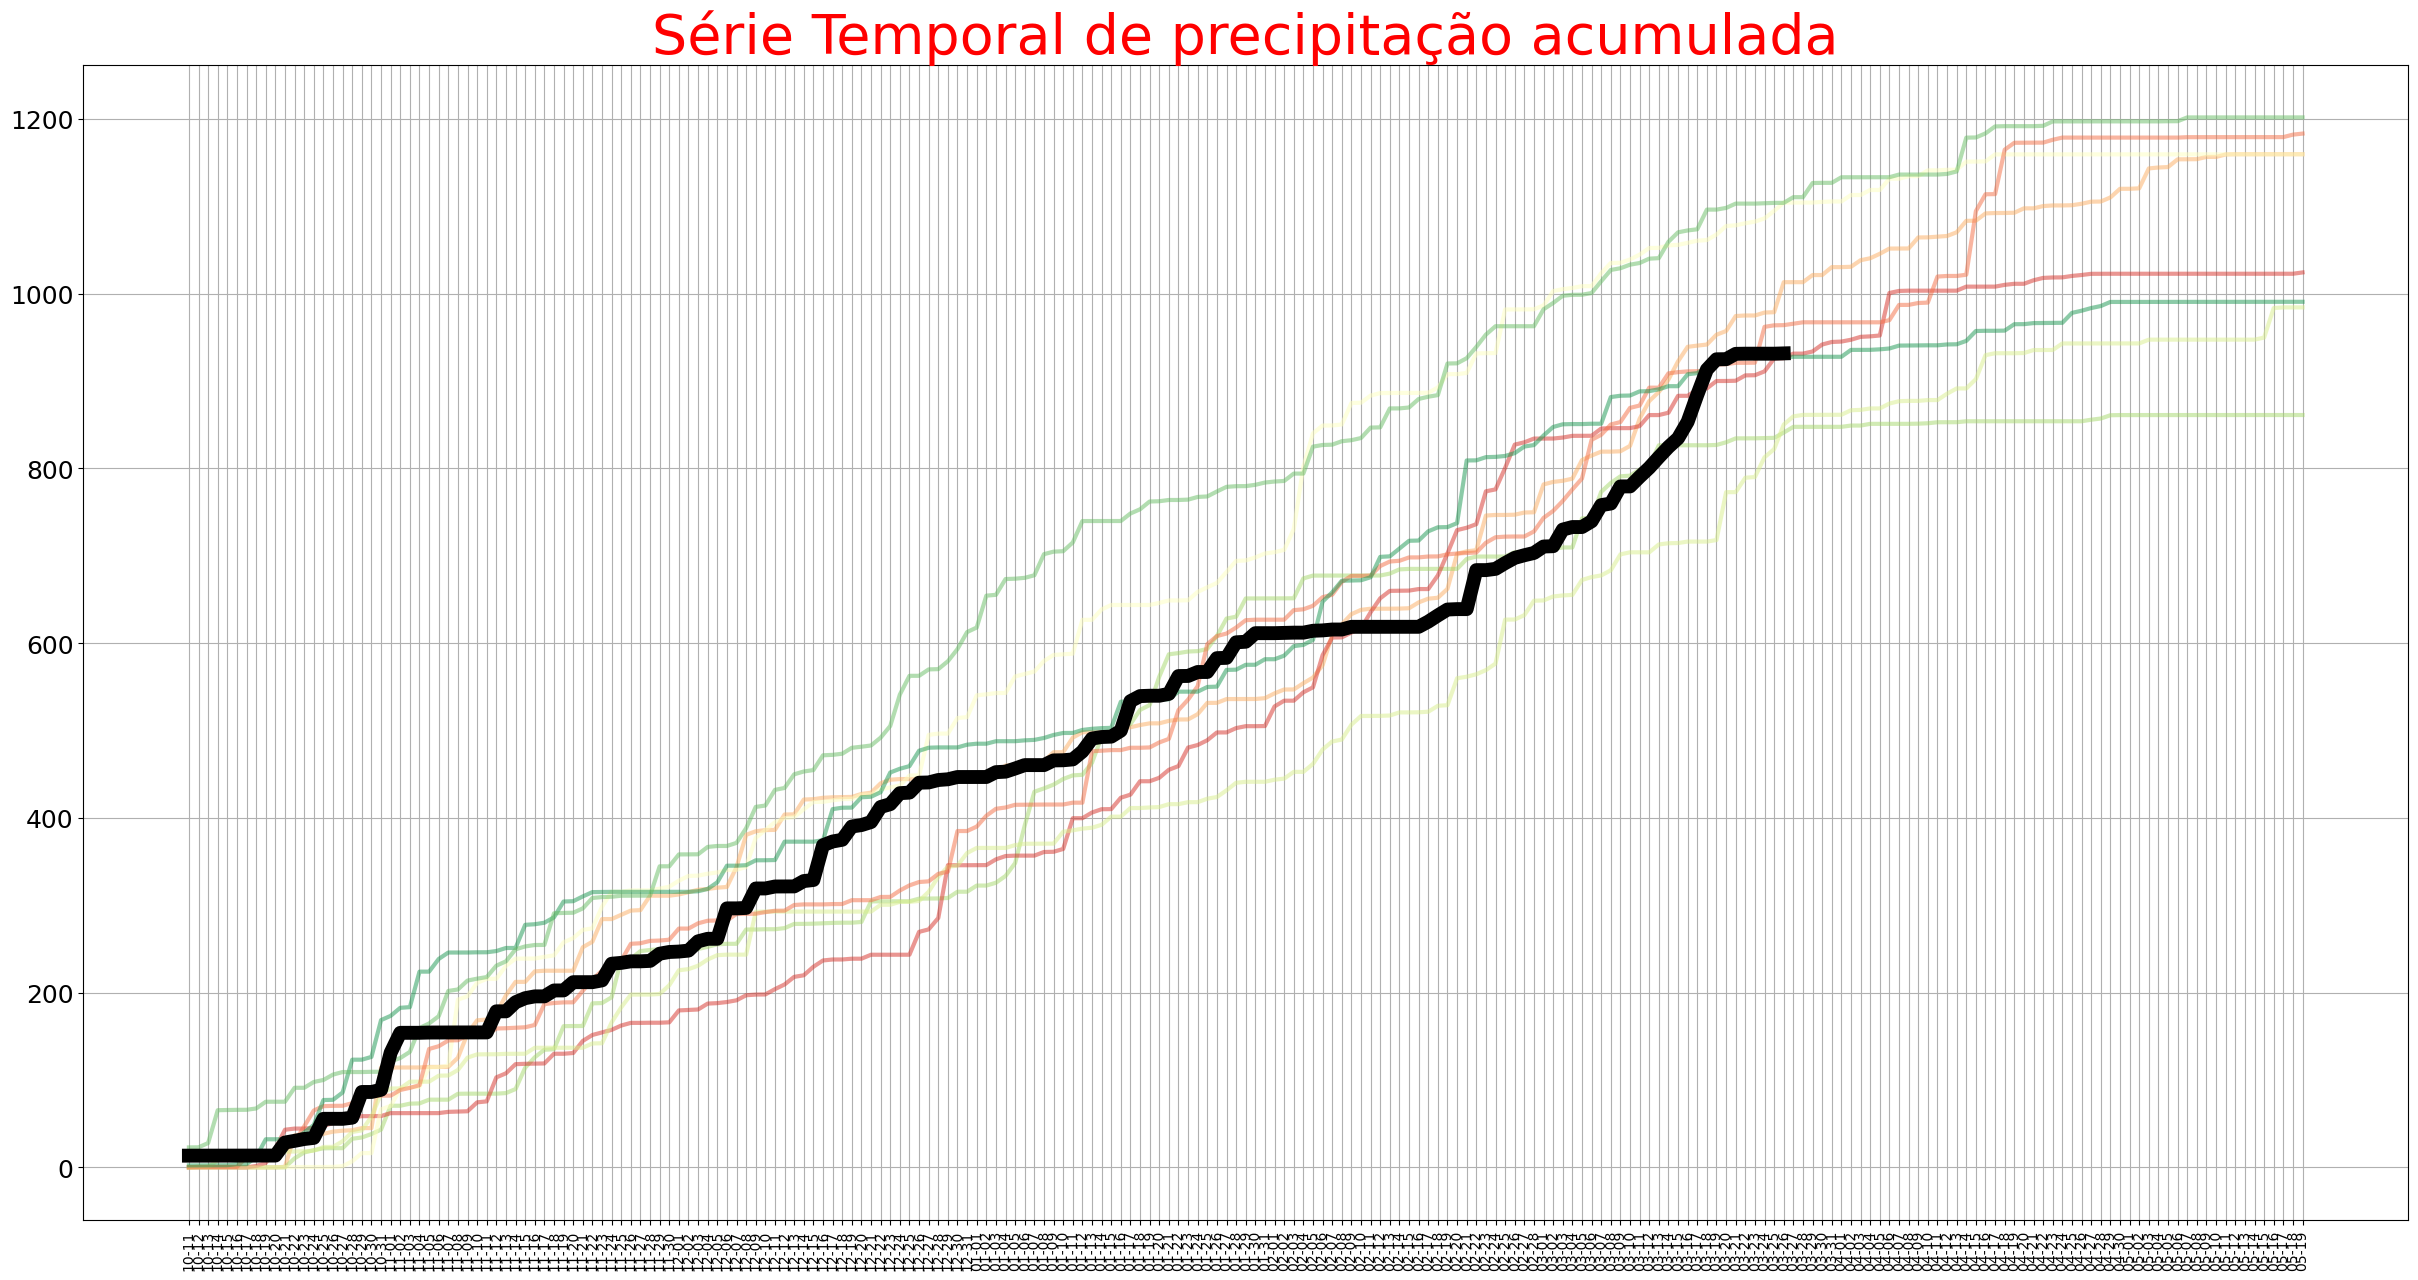

In [63]:
s = sumcum_comp['mm_dd']
x = s.to_numpy()
y = sumcum_comp['2014'].to_numpy()
y2 = sumcum_comp['2015'].to_numpy()
y3 = sumcum_comp['2016'].to_numpy()
y4 = sumcum_comp['2017'].to_numpy()
y5 = sumcum_comp['2018'].to_numpy()
y6 = sumcum_comp['2019'].to_numpy()
y7 = sumcum_comp['2020'].to_numpy()
y8 = sumcum_comp['2021'].to_numpy()
target = sumcum_comp['hourlypreciprate'].to_numpy()

plt.figure(figsize=(30, 15))
#plt.subplot(2,1,1)
#plt.plot(x, y, label="y_serie_bruta")

plt.plot(x, y, linewidth=3, color = colors['2014'], alpha = 0.5)
plt.plot(x, y2, linewidth=3, color = colors['2015'], alpha = 0.5)
plt.plot(x, y3, linewidth=3, color = colors['2016'], alpha = 0.5)
plt.plot(x, y4, linewidth=3, color = colors['2017'], alpha = 0.5)
plt.plot(x, y5, linewidth=3, color = colors['2018'], alpha = 0.5)
plt.plot(x, y6, linewidth=3, color = colors['2019'], alpha = 0.5)
plt.plot(x, y7, linewidth=3, color = colors['2020'], alpha = 0.5)
plt.plot(x, y8, linewidth=3, color = colors['2021'], alpha = 0.5)
plt.plot(x, target, linewidth=10, color = 'black', label="Current year")
plt.grid(True)
plt.title("Série Temporal de precipitação acumulada", fontsize = 40, color = 'red')
plt.xticks(fontsize=10, color = 'black', rotation=90)
plt.yticks(fontsize=18, color = 'black')
ax = plt.gca()
# every_nth = 4
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
#plt.savefig(r'C:\Users\jabre\Documents\merx\AnaliseCredito\Financiadas\CARLOS_GUILHERME\TO-1720978-B722E607B52342A7B7A8927D857C6F8D\NDVI\NDVI_todos.png', bbox_inches='tight')
plt.show()

In [64]:
stats = sumcum_comp[['hourlypreciprate', 'mean','median', 'max', 'min', 'std']]

c =stats[(stats['hourlypreciprate']>(stats['median'] + stats['std'])) | (stats['hourlypreciprate']<(stats['median'] - stats['std']))].count()

print(str(round(c.iloc[0]/len(stats[stats['hourlypreciprate'] > -1])*100, 2))\
      + " % dos dias durante o ciclo foram considerados outliers em relação aos dados históricos de precipitação acumulada")

c_h = high_comp_sumcum[(high_comp_sumcum['hourlypreciprate']<high_comp_sumcum['mean'])].count()

print(str(round(c_h.iloc[0]/len(high_comp_sumcum[high_comp_sumcum['hourlypreciprate'] > -1])*100, 2)) \
      + "% dos dias durante o ciclo estiveram abaixo da média de precipitação acumulada das safras com alta produtividade")

c_l = low_comp_sumcum[(low_comp_sumcum['hourlypreciprate']<low_comp_sumcum['mean'])].count()

print(str(round(c_l.iloc[0]/len(low_comp_sumcum[low_comp_sumcum['hourlypreciprate'] > -1])*100, 2)) \
      + "% dos dias durante o ciclo estiveram abaixo da média de precipitação acumulada das safras com baixa produtividade")

3.59 % dos dias durante o ciclo foram considerados outliers em relação aos dados históricos de precipitação acumulada
95.21% dos dias durante o ciclo estiveram abaixo da média de precipitação acumulada das safras com alta produtividade
37.13% dos dias durante o ciclo estiveram abaixo da média de precipitação acumulada das safras com baixa produtividade


## Get planting date

In [65]:
def escala(image):
    b4 = image.select('B4').multiply(0.0001).float();
    b3 = image.select('B3').multiply(0.0001).float();
    b2 = image.select('B2').multiply(0.0001).float();
    b8 = image.select('B8').multiply(0.0001).float();
    return b4.addBands(b3).addBands(b2).addBands(b8).copyProperties(image,['system:time_start','system:time_end']);

def Ndvi(img):  
    Ndvi_image = img.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return img.addBands(Ndvi_image)

def Ndvi_ls(img):  
    Ndvi_image = img.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return img.addBands(Ndvi_image)

def apply_scale_factors(image):
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    return image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)

def renomear(img) :
    img = ee.Image(img.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']))
    img = img.rename(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'])
    #img = img.gt('properties:CLOUD_COVER_LAND').rename('CLOUD_COVERAGE_ASSESSMENT')
    return img


#**************************************************************************
# Agregando as informações do S2 e LS e ordenando por data 
#**************************************************************************
def serie_temporal_s2_ls(start_date, end_date, lat_long):
    point = lat_long.buffer(100)

    S2_ts = (ee.ImageCollection('COPERNICUS/S2_SR')
            .filterBounds(point)
            .filterDate(start_date, end_date)
            .maskClouds()
            .scaleAndOffset()
            .spectralIndices(['NDVI'])
            .select(['NDVI']))
    
    dataset9_t1 = (ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')
            .filterBounds(point)
            #.filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
            .map(apply_scale_factors)
            .map(renomear)
            .map(Ndvi_ls)
            .filterDate(start_date, end_date))

    dataset9_t2 = (ee.ImageCollection('LANDSAT/LC09/C02/T2_L2')
            .filterBounds(point)
            #.filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
            .map(apply_scale_factors)
            .map(renomear)
            .map(Ndvi_ls)
            .filterDate(start_date, end_date))

    dataset8_t1 = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
          .filterBounds(point)
          #.filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
          .map(apply_scale_factors)
          .map(renomear)
          .map(Ndvi_ls)
          .filterDate(start_date, end_date))

    dataset8_t2 = (ee.ImageCollection('LANDSAT/LC08/C02/T2_L2')
          .filterBounds(point)
          #.filter(ee.Filter.lt('CLOUD_COVER', CLOUD_FILTER))
          .map(apply_scale_factors)
          .map(renomear)
          .map(Ndvi_ls)
          .filterDate(start_date, end_date))
    
    LS_ts = dataset9_t1.merge(dataset9_t2).merge(dataset8_t1).merge(dataset8_t2).sort("system:time_start")
    
    NDVI_merged = S2_ts.merge(LS_ts).sort('system:time_start')
    #LS_ts.size().getInfo()
    #S2_ts.size().getInfo()
    #NDVI_merged.size().getInfo()
    
    ts_NDVI_merged = NDVI_merged.getTimeSeriesByRegion(reducer = [ee.Reducer.mean()],
                              geometry = point,
                              bands = ['NDVI'],
                              scale = 30)

    ts_ndvi_merged = geemap.ee_to_pandas(ts_NDVI_merged)

    ts_ndvi_merged[ts_ndvi_merged == -9999] = np.nan
    return ts_ndvi_merged 

#**************************************************************************
# Tratamento da série temporal com os sensores S2 e LS
#**************************************************************************

def tratamento_serie_temporal(ts_ndvi_merged):
    ## série bruta

    #x_merged = ts_ndvi_merged['date'].to_numpy()
    #y_merged = ts_ndvi_merged['NDVI'].to_numpy()
    ts_ndvi_merged["id"] = ts_ndvi_merged.index

    ## série interpolada

    ts_spline_merged = ts_ndvi_merged.interpolate('spline', order=5)
    #x_spline_merged= ts_spline_merged['date'].to_numpy()
    y_spline_merged = ts_spline_merged['NDVI'].to_numpy()
    ts_spline_merged["id"] = ts_spline_merged.index

    ## série suavizada

    y_smooth_merged = signal.savgol_filter(y_spline_merged, window_length=11, polyorder=2, mode="nearest")
    
    return y_smooth_merged, ts_spline_merged, y_spline_merged

#**************************************************************************
#Definir a posição da emergência na série temporal --> Regra de negócio (incorporando outras regras aqui)
#**************************************************************************


def emergencia(serie):
    
    #Identifica a data de plantio
    p = 1
    plantio_def = np.nan
    for j in range(len(serie)-4):
        #print(serie[j])
        if float(serie[j]) > 0.5:
           # menos_1 = p-1 #0
            mais_1  = p+1 #2
            mais_2  = p+2 #3
            mais_3  = p+3 #4
            if serie[p] < serie[mais_1] and serie[p] < serie[mais_2] \
                                        and serie[p] < serie[mais_3]:
                plantio_def = p
                #print(j)
                #print(serie[j])
                break      
            p+=1
        
    return plantio_def, j

In [66]:
data_de_plantio = {}
for i in range(1,len(talhoes)+1):
    #MT
    start_date = '2022-10-01'
    end_date = '2023-12-31'

    #i =1
    talhao = talhoes.loc[talhoes['talhao'] == i]
    gdf = gpd.read_file(str(talhao['geom'][i-1]), driver='GeoJSON')
    geo_json = gdf.to_json()
    j = json.loads(geo_json)
    talhaoFc = ee.FeatureCollection(j)
    lat_long = talhaoFc.geometry().centroid()

    ts_ndvi_merged = serie_temporal_s2_ls(start_date, end_date, lat_long) ### serie temporal sentinel e landsat's
    y_smooth_merged, ts_spline_merged, y_spline_merged = tratamento_serie_temporal(ts_ndvi_merged)

    on, p = emergencia(y_smooth_merged) 
    plantio_data = ts_spline_merged.iloc[p]['date']
    data_de_plantio[i] = datetime.strptime(plantio_data, '%Y-%m-%dT%H:%M:%S') - timedelta(days = 40)

In [67]:
bar_satveg = pd.read_csv(r'C:\Projetos\penalizacao\satveg_planilha_mt.csv', sep = ';')
bar_ref = pd.read_csv(r'C:\Projetos\penalizacao\ref.csv', sep = ';')

In [68]:
bar_ref['NDVI'] = pd.to_numeric(bar_ref['NDVI'].str.replace(',','.')) 
#bar_ref.plot(x = 'DAS', y = 'NDVI')

bar_satveg['NDVI'] = pd.to_numeric(bar_satveg['NDVI'].str.replace(',','.')) 
#bar_satveg.plot(x = 'DAS', y = 'NDVI')

In [69]:
c = pd.concat([bar_satveg, bar_ref]).sort_values(by='DAS')
#c.plot(x = 'DAS', y = 'NDVI')
c['curve'] = signal.savgol_filter(c['NDVI'].to_numpy(), window_length=7, polyorder=2, mode="nearest")
#c.plot(x = 'DAS', y = 'curve')

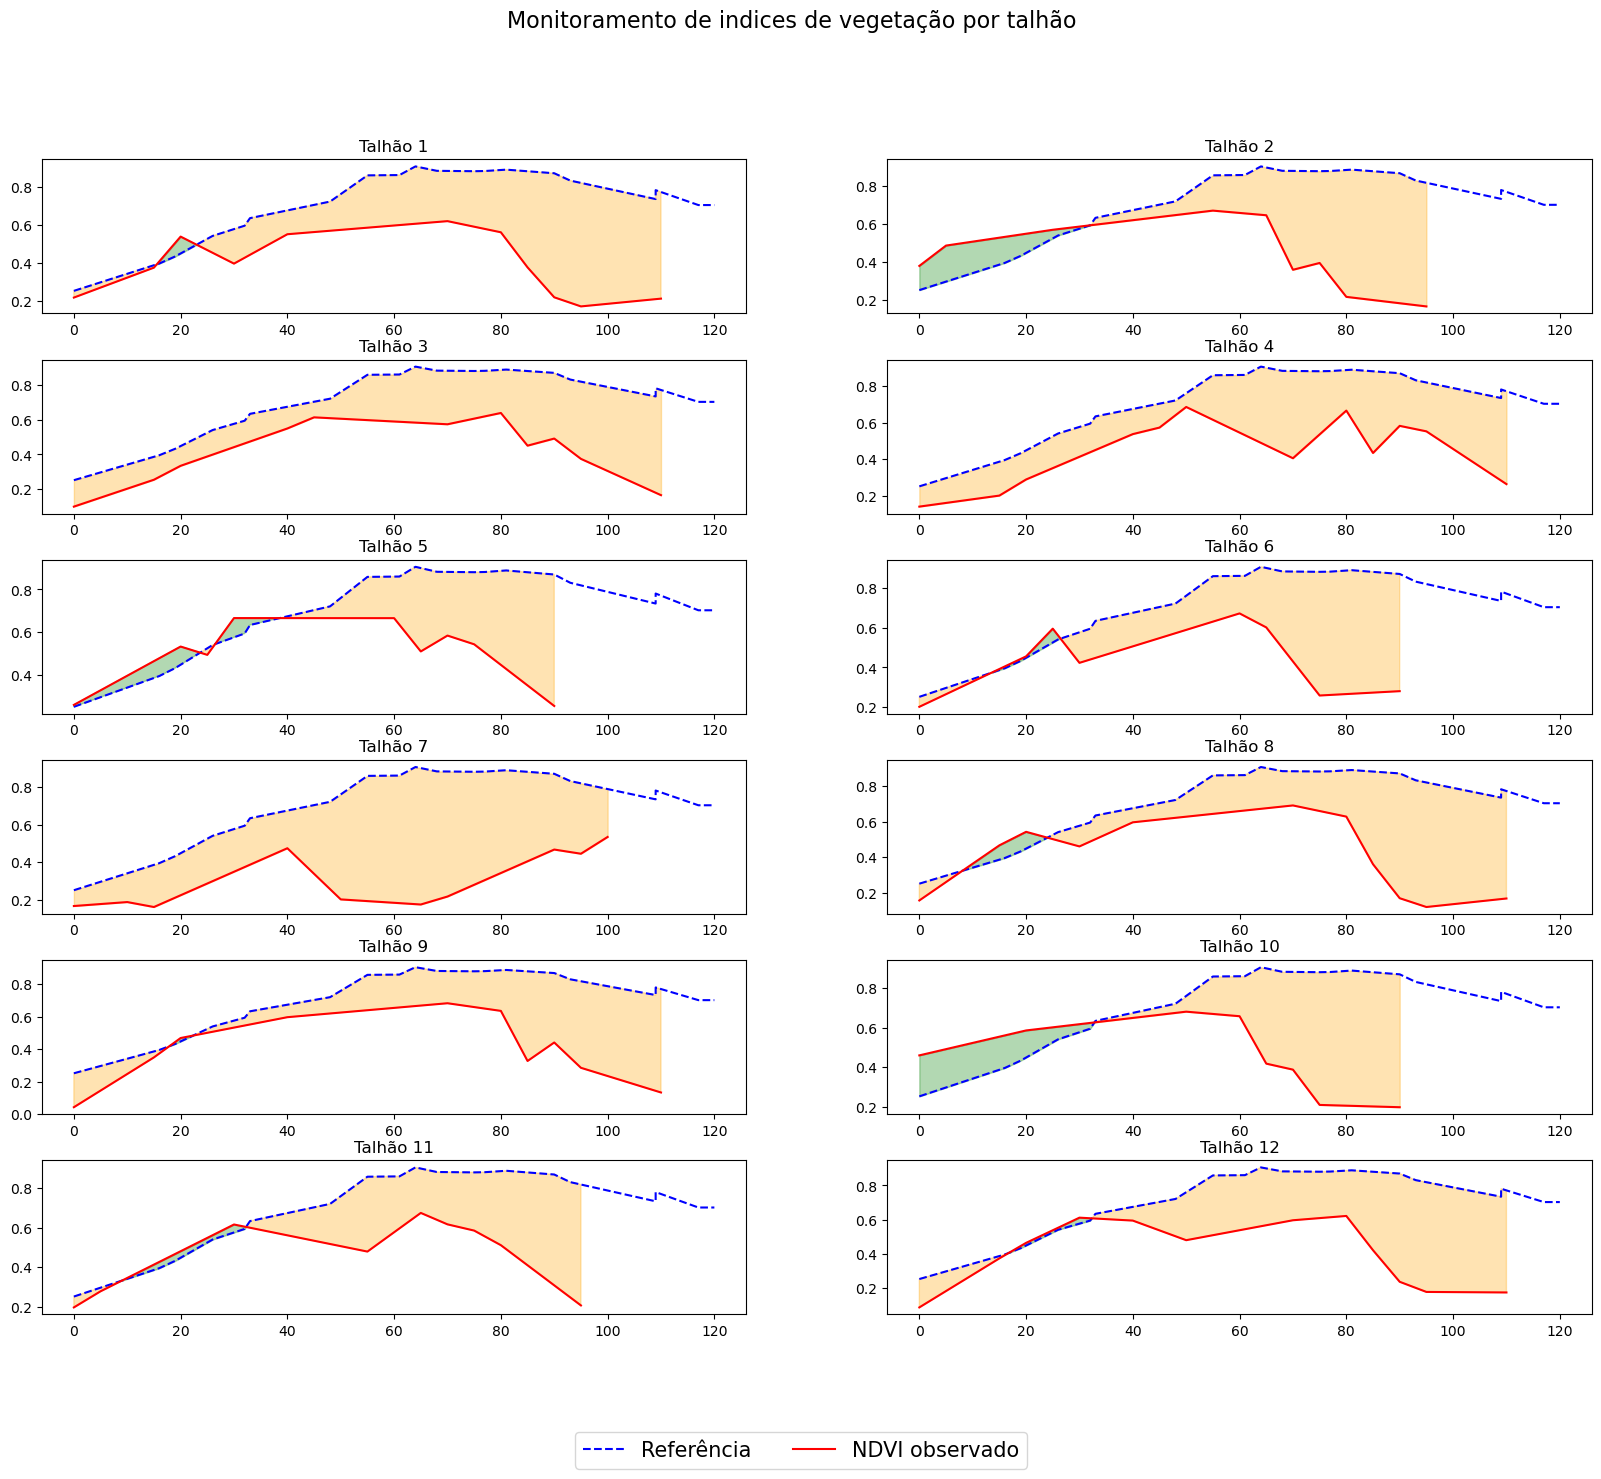

In [84]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))
#Criação de subplots para cada UF.
fig, axs = plt.subplots(len(talhoes)//2,2, figsize=(20, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=0.2)
fig.suptitle('Monitoramento de indices de vegetação por talhão', fontsize=16)
axs = axs.ravel()

for n in range(0, len(talhoes)):
    dataset = ts_ndvi[ts_ndvi['talhao'] == n+1]
    dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%dT%H:%M:%S')
    dates = dataset['date'].to_numpy().astype("datetime64[D]")
    dp =  np.datetime64(data_de_plantio[n+1]).astype("datetime64[D]")
    planting_date = nearest(dates, dp)

    harvest_date = planting_date + np.timedelta64(120,'D')

    mask = (dataset['date'] > planting_date) & (dataset['date'] <= harvest_date)

    dataset = dataset.loc[mask]

    dataset['DAS'] = (dataset['date'] - planting_date).dt.days

    ds = dataset.set_index('DAS')[['ndvi']]

    for i in range(121):
        if i not in ds.index:
            row = pd.Series({'ndvi':np.nan},name=i)
            ds = ds.append(row)

    ds.sort_index(inplace=True)

    ref_ds = c.set_index('DAS')[['curve']]
    for i in range(121):
        if i not in ref_ds.index:
            row = pd.Series({'curve':np.nan},name=i)
            ref_ds = ref_ds.append(row)
    ref_ds.sort_index(inplace=True)

    plot_ds = pd.merge(ref_ds, ds, left_index = True, right_index = True)
    plot_ds.columns = ['Referência', 'NDVI observado']
    plot_ds= plot_ds.apply(pd.to_numeric)
    plot_ds = plot_ds.apply(lambda x: x.interpolate(method='index'))
    today = (dataset.iloc[-1]['date'] - planting_date).days 
    plot_ds.loc[plot_ds.index > today, 'NDVI observado'] = np.nan
    y1 = plot_ds['Referência']
    y2 = plot_ds['NDVI observado']
    x = plot_ds.index
    #plot_ds['ndvi'] = plot_ds['ndvi'].interpolate(method='polynomial', order=3)
    axs[n].plot(x,y1,'--', color = 'blue')
    axs[n].plot(x,y2,color = 'red')
    axs[n].set_title('Talhão {}'.format(n+1))
    axs[n].fill_between(x, y1,y2, where=(y1 > y2), color='orange', alpha=0.3,
                 interpolate=True)
    axs[n].fill_between(x, y1, y2, where=(y1 <= y2), color='green', alpha=0.3,
                     interpolate=True)
plt.figlegend(labels = ["Referência", 'NDVI observado'], loc = 'lower center', ncol=2, labelspacing=0., fontsize= 15) 